<a href="https://colab.research.google.com/github/MSamhitha/Netflix-Movies-and-TV-Shows-Clusturing/blob/main/Netflix_Movies_and_TV_Shows_Clustering_Samhitha_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Summary -**

The "Netflix TV Shows and Movies Clustering" project is a comprehensive exploration of the vast content library on the Netflix streaming platform. Netflix offers a wide range of TV shows and movies, and while this extensive selection is a major strength, it can also pose challenges for users who are looking for content that aligns with their interests. The aim of this project is to address this challenge by applying data science and machine learning techniques to cluster Netflix content, thus enabling more effective content discovery for users.

The project consists of several key components:

Data Cleaning: The project begins with data cleaning, where we handle missing values, improve data quality, and prepare the dataset for analysis. This step is crucial to ensure the accuracy of our subsequent analyses and modeling.

Exploratory Data Analysis (EDA): In the EDA phase, we conduct a comprehensive examination of the Netflix dataset. We uncover valuable insights into content trends, such as the balance between TV shows and movies, the growth of the content library over the years, and the impact of external factors like the COVID-19 pandemic on content additions. Additionally, we analyze the timing of content additions, noting that most new content is released at the start or middle of the month. This strategic timing suggests an understanding of user behaviors and financial cycles, which could lead to increased viewership and subscriber satisfaction.

Textual Data Preprocessing: To analyze and cluster content effectively, we preprocess textual data, including titles and descriptions. Text preprocessing techniques are employed to transform and clean the text, making it suitable for subsequent machine learning tasks.

Dimensionality Reduction (PCA): In this phase, Principal Component Analysis (PCA) is applied to reduce the dimensionality of the dataset. Dimensionality reduction is essential to simplify the data and improve the efficiency of clustering algorithms.

Machine Learning Model Implementation: The core of the project involves the implementation of machine learning models. Three key techniques are applied:

K-Means Clustering: K-Means clustering is utilized to group content based on various features. It is a popular method for clustering data points into distinct clusters, which can help in creating content categories.

Hierarchical Clustering: Hierarchical clustering is another clustering technique applied to Netflix content. It creates a hierarchy of clusters, which can offer more granularity in content grouping.

Recommendation System: A recommendation system is developed to provide users with personalized content suggestions. This system leverages user preferences and viewing history to recommend content that aligns with individual tastes.

Evaluation Metrics: The quality of clustering is assessed using several metrics, including the Silhouette Score, Calinski-Harabasz Score, and Davies-Bouldin Score. These metrics help in quantifying the effectiveness of the clustering algorithms and guide our choice of the best-performing method.

The project's insights from EDA underscore Netflix's content trends, genre preferences, and content release strategies. It is observed that Netflix has more movies than TV shows, with a steady increase in content until 2019, followed by a decrease in 2020, likely due to the pandemic. The most significant decline in content additions occurred in 2021. Additionally, the timing of content additions, with a focus on the beginning and middle of the month, hints at a strategic approach for content release.

In terms of content genres, "International Movies," "Dramas," "Comedies," "International TV Shows," and "Documentaries" dominate the platform. For TV shows, October, November, and December are popular months for additions, while for movies, January, October, and December are the preferred months. February, on the other hand, is the least popular month for additions in both categories.

The machine learning phase revealed K-Means Clustering as the preferred method, delivering strong performance in clustering evaluation metrics. This method excelled in Calinski-Harabasz and Davies-Bouldin scores, indicating superior cluster separation and distinctiveness. It also achieved a robust Silhouette score, confirming its proficiency in creating well-defined content clusters.

In summary, the "Netflix TV Shows and Movies Clustering" project addresses the challenge of content discovery on Netflix by employing data preprocessing, dimensionality reduction, and machine learning techniques. By clustering content and creating a recommendation system, this project aims to enhance the user experience and offer more personalized content suggestions on the platform. The valuable insights gained from EDA provide a deeper understanding of content trends and user preferences, guiding content management and release strategies for Netflix in the future.

# **Problem Statement**


**Netflix offers an extensive library of TV shows and movies, and users often find it challenging to discover content tailored to their preferences. This project aims to tackle this issue by clustering Netflix content into meaningful groups based on various attributes.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import missingno as msno
import datetime as dt
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer
from sklearn.decomposition import PCA
nltk.download('stopwords')
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from nltk.corpus import stopwords
import re
import string
from nltk.tokenize import word_tokenize
import scipy.cluster.hierarchy as shc
from nltk.stem.snowball import SnowballStemmer
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/DATAS/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

   release_year rating   duration  \
0          2020  TV-MA  4 Seasons   
1          2016  TV-MA     93 min   
2          2011      R     78 min   
3          2009  PG-13     80 min   
4          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description month_added  year_added  \
0  In a future where the elite inhabit an island ...      August        2020   
1  After a devastating earthquake hits Mexico Cit...    December        2016   
2  When an army recruit is found dead, his fellow...    December        2018   
3  In a postapocalyptic world, rag-doll robots hi...    November        2017   
4  A brilliant group of students become card-coun...     January        2020   

   day_added  
0         14  
1         23  
2         20  
3         16  
4          1

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

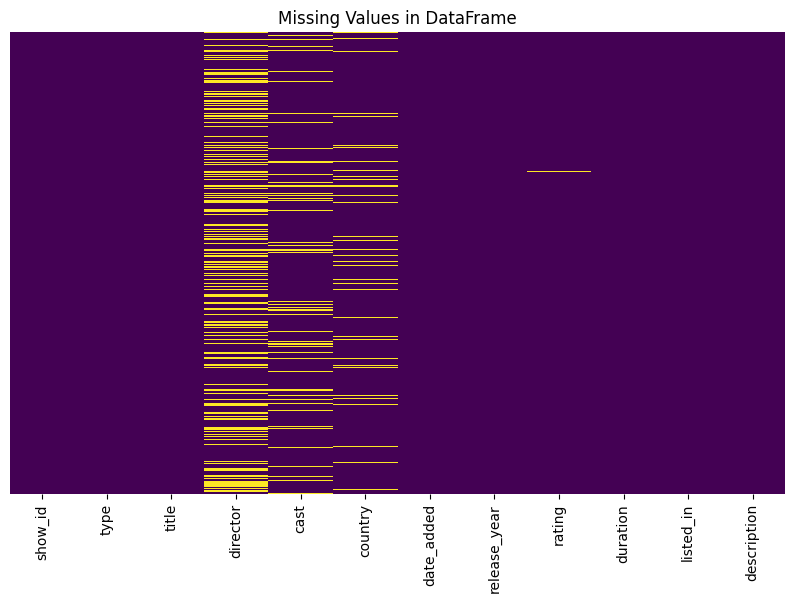

In [ ]:
# Visualizing the missing values

# Generate a DataFrame of missing values
missing_data = df.isnull()

# Use seaborn to create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data=missing_data, cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values in DataFrame')
plt.show()


### What did you know about your dataset?

The dataset contains missing values in columns such as "director," "cast," "country," "date_added," and "rating," with no duplicate entries.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='all')

show_id   type title                director                cast  \
count     7787   7787  7787                    5398                7069   
unique    7787      2  7787                    4049                6831   
top         s1  Movie    3%  Raúl Campos, Jan Suter  David Attenborough   
freq         1   5377     1                      18                  18   
mean       NaN    NaN   NaN                     NaN                 NaN   
std        NaN    NaN   NaN                     NaN                 NaN   
min        NaN    NaN   NaN                     NaN                 NaN   
25%        NaN    NaN   NaN                     NaN                 NaN   
50%        NaN    NaN   NaN                     NaN                 NaN   
75%        NaN    NaN   NaN                     NaN                 NaN   
max        NaN    NaN   NaN                     NaN                 NaN   

              country       date_added  release_year rating  duration  \
count            7280             7777   7787.000000   7780      7787   
unique            681             1565           NaN     14       216   
top     United States  January 1, 2020           NaN  TV-MA  1 Season   
freq             2555              118           NaN   2863      1608   
mean              NaN              NaN   2013.932580    NaN       NaN   
std               NaN              NaN      8.757395    NaN       NaN   
min               NaN              NaN   1925.000000    NaN       NaN   
25%               NaN              NaN   2013.000000    NaN       NaN   
50%               NaN              NaN   2017.000000    NaN       NaN   
75%               NaN              NaN   2018.000000    NaN       NaN   
max               NaN              NaN   2021.000000    NaN       NaN   

            listed_in                                        description  
count            7787                                               7787  
unique            492                                               7769  
top     Documentaries  Multiple women report their husbands as missin...  
freq              334                                                  3  
mean              NaN                                                NaN  
std               NaN                                                NaN  
min               NaN                                                NaN  
25%               NaN                                                NaN  
50%               NaN                                                NaN  
75%               NaN                                                NaN  
max               NaN                                                NaN

### Variables Description

show_id : Unique ID for every Movie / Tv Show

type : Identifier - A Movie or TV Show

title : Title of the Movie / Tv Show

director : Director of the Movie

cast : Actors involved in the movie / show

country : Country where the movie / show was produced

date_added : Date it was added on Netflix

release_year : Actual Releaseyear of the movie / show

rating : TV Rating of the movie / show

duration : Total Duration - in minutes or number of seasons

listed_in : Genere

description : The Summary description

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Replacing missing values in 'director','cast','country' columns with 'Unknown' as it is a textual data.

df[['director','cast','country']] = df[['director','cast','country']].fillna('Unknown')

# Replacing missing values in 'rating' column with mode.

df['rating'] = df['rating'].fillna(df['rating'].mode()[0])


In [ ]:
# changing data type format of 'date_added' column to datetime.
df['date_added'] = pd.to_datetime(df['date_added'])

In [ ]:
# adding month column.
df['month_added'] = pd.to_datetime(df['date_added']).dt.month
df['month_added'] = pd.to_datetime(df['month_added'], format='%m').dt.strftime('%B')

In [ ]:
# adding year added column to dataset.

df['year_added'] = pd.to_datetime(df['date_added']).dt.year

In [ ]:
df["day_added"]= df["date_added"].dt.day

In [ ]:
# Dropping date_added
df.drop('date_added', axis=1, inplace=True)

In [ ]:
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

   release_year rating   duration  \
0          2020  TV-MA  4 Seasons   
1          2016  TV-MA     93 min   
2          2011      R     78 min   
3          2009  PG-13     80 min   
4          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description month_added  year_added  \
0  In a future where the elite inhabit an island ...      August        2020   
1  After a devastating earthquake hits Mexico Cit...    December        2016   
2  When an army recruit is found dead, his fellow...    December        2018   
3  In a postapocalyptic world, rag-doll robots hi...    November        2017   
4  A brilliant group of students become card-coun...     January        2020   

   day_added  
0         14  
1         23  
2         20  
3         16  
4          1

### What all manipulations have you done and insights you found?

- Replaced missing values in the 'director', 'cast', and 'country' columns with the label 'Unknown'.

- Imputing missing values in the 'rating' column with the mode.

- Transformed the 'duration' column in the dataframe by splitting the string value on whitespace delimiter and converting it into an integer datatype.

- Converted the timestamp in the 'date_added' column to datetime format to fetch other details.And added new columns to the dataframe, such as 'month_added' and 'year_added',date_added to gain more insights from the data.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

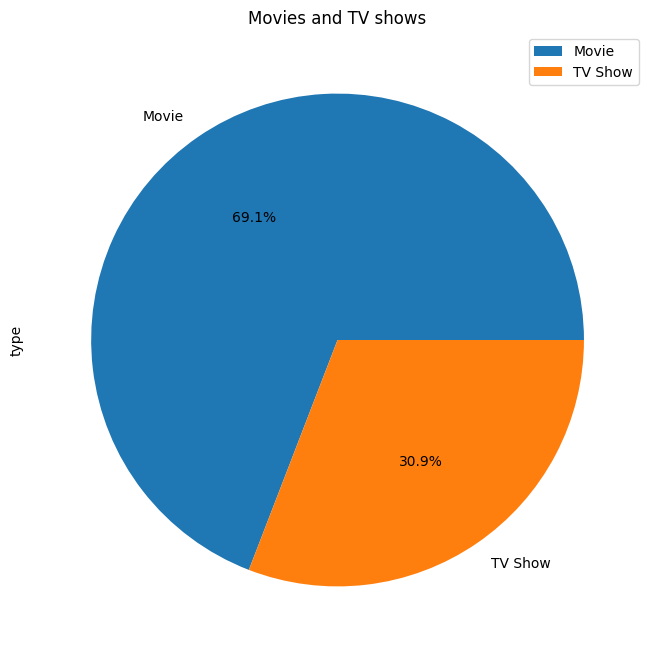

In [ ]:
# Chart - 1 visualization code
df['type'].value_counts().plot.pie(autopct='%1.1f%%',figsize = (15,8),title = 'Movies and TV shows')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart is a common choice for displaying the distribution of categorical data, such as the number of movies and TV shows in the Netflix dataset.

##### 2. What is/are the insight(s) found from the chart?

In the Netflix dataset, there is a notable difference in the count between movies and TV shows, with movies having a higher representation. This suggests that Netflix tends to offer a larger selection of movies compared to TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Netflix can create targeted marketing campaigns to promote their extensive movie collection. They can segment their audience based on preferences, improving the effectiveness of their recommendations and marketing efforts.



#### Chart - 2

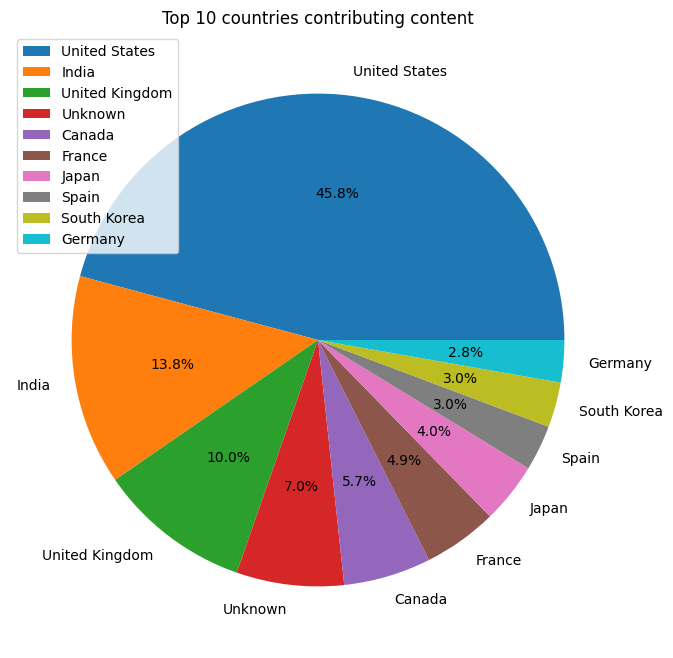

In [ ]:
# Chart - 2 visualization code

(df['country'].apply(lambda x: pd.Series(x.split(', '))).stack().value_counts()[:10]).plot.pie(autopct='%1.1f%%',figsize = (8,8),title = 'Top 10 countries contributing content')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart is a common choice for displaying the distribution of categorical data. It allows for easy comparison between categories and can provide a clear visualization of the overall distribution of content types in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The United States is the largest contributor to the content, accounting for 45.8% of the total. This suggests that American content, including movies and TV shows, plays a central role in the platform's catalog.India and the UK also have significant contributions, accounting for 13.8% and 10% respectively.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Offering content from various countries can be a positive business strategy. It helps in engaging viewers with different cultural backgrounds and preferences, potentially leading to a larger and more loyal customer base.

#### Chart - 3

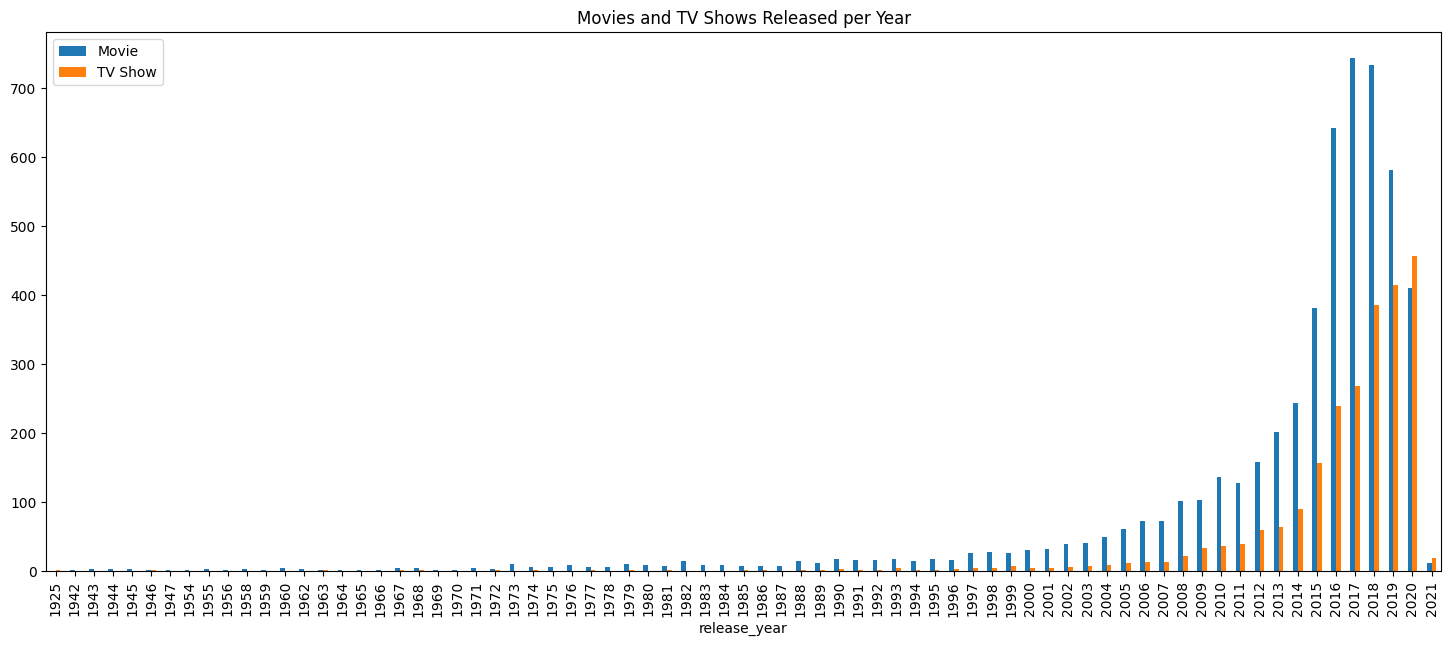

In [ ]:
import matplotlib.pyplot as plt

# Create the bar plot
df.groupby('release_year').type.value_counts().unstack().plot.bar(figsize=(18, 7))
plt.title('Movies and TV Shows Released per Year')
plt.legend()
plt.show()



##### 1. Why did you pick the specific chart?

I chose the specific chart, a stacked bar chart, because it allows for a clear comparison between the number of movies and TV shows released in different years.

##### 2. What is/are the insight(s) found from the chart?

The chart indicates that the number of movies and TV shows released each year varies. In particular, it reveals that the number of releases for both movies and TV shows in the year 2021 is significantly lower compared to other years, suggesting a potential decline in content production for that year.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The drop in content releases in 2021 may have implications. If the decrease is related to external factors like the pandemic, it might not be a long-term issue. However, if it's due to a lack of new content, it could lead to negative growth and reduced customer engagement. Ensuring a consistent flow of content releases is crucial for retaining and attracting subscribers.

#### Chart - 4

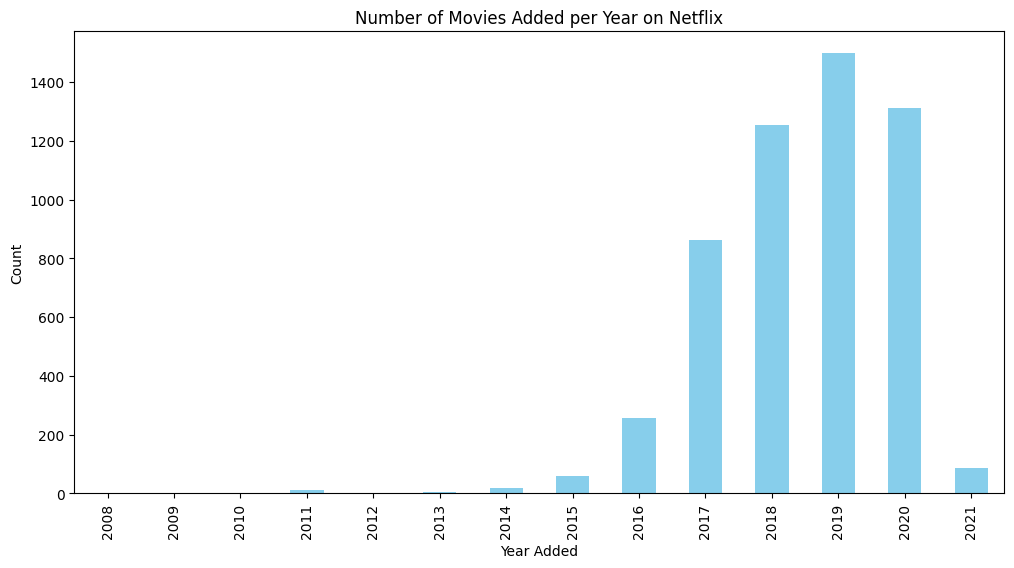

In [ ]:
# Chart - 4 visualization code

# Filter the dataset for movies
movies = df[df['type'] == 'Movie']

# Group and count movies by year added
movies_added_by_year = movies.groupby('year_added')['type'].count()

# Create a bar plot for the number of movies added per year
plt.figure(figsize=(12, 6))
movies_added_by_year.plot(kind='bar', color='skyblue')
plt.title('Number of Movies Added per Year on Netflix')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.show()


##### 1. Why did you pick the specific chart?

I chose a bar chart to specifically visualize the trend in the number of movies added per year. A bar chart is a straightforward way to display the count of movies added in each year, making it easy to identify patterns and trends over time.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that the number of movies added increased steadily up to 2019, indicating growth in the content library.
In 2020, there was a slight decrease in the number of movies added compared to the previous year. This could be attributed to various factors, including the impact of the COVID-19 pandemic on content production and release schedules.
The most significant insight is the sharp decline in 2021, which represents a substantial drop in the number of movies added.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The significant drop in 2021 may lead to negative growth if not addressed. A reduced number of new movies added could result in subscriber dissatisfaction and potential churn. Streaming platforms need to ensure a consistent flow of content to maintain and attract subscribers.

#### Chart - 5

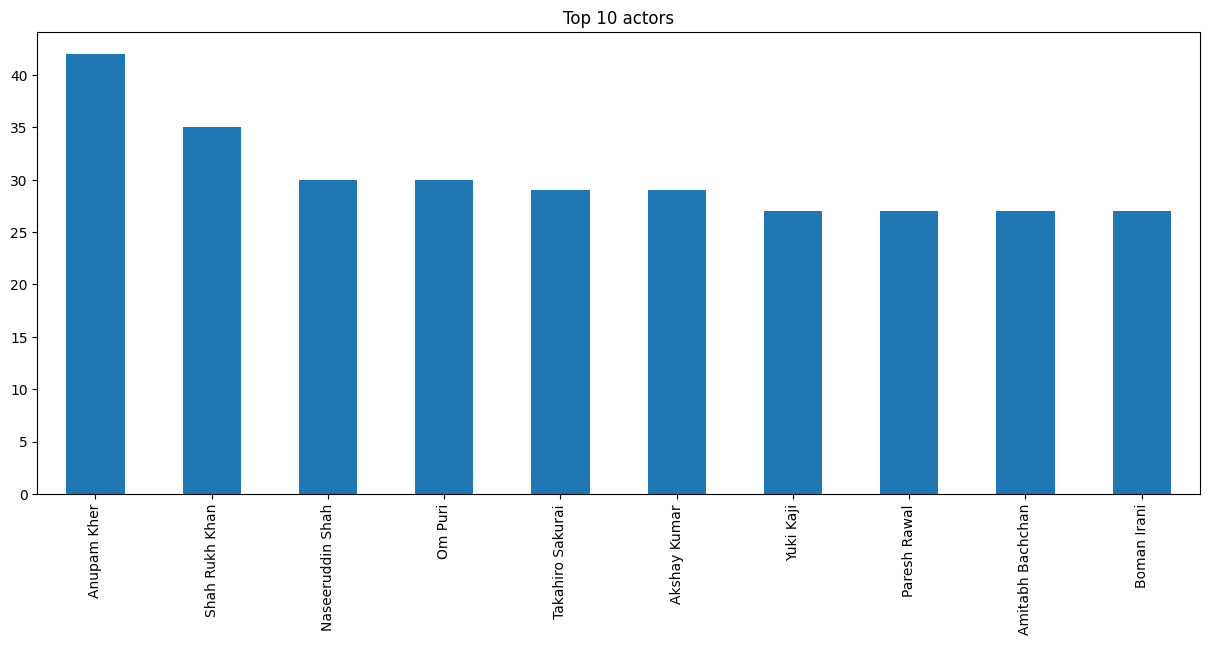

In [ ]:
# Chart - 5 visualization code

(df.cast.apply(lambda x: pd.Series(x.split(', '))).stack().value_counts()[1:11]).plot.bar(figsize = (15,6), title = 'Top 10 actors')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart to visualize the top 10 actors with the most appearances in the Netflix dataset. A bar chart is an effective way to represent the frequency of appearances for each actor, allowing for easy comparison and ranking.

##### 2. What is/are the insight(s) found from the chart?

The top actor by the number of shows they appeared in is Anupam Kher, with 42 appearances.

The second most popular actor is Shah Rukh Khan, with 35 appearances.

The top 10 actors are primarily from India, with the exception of Takahiro Sakurai and Yuki Kaji from Japan.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can have a positive impact on Netflix's business. They can help in content planning, recommendations, and acquisition. By understanding the popularity of certain actors, Netflix can tailor content suggestions to viewers interested in these actors.

#### Chart - 6

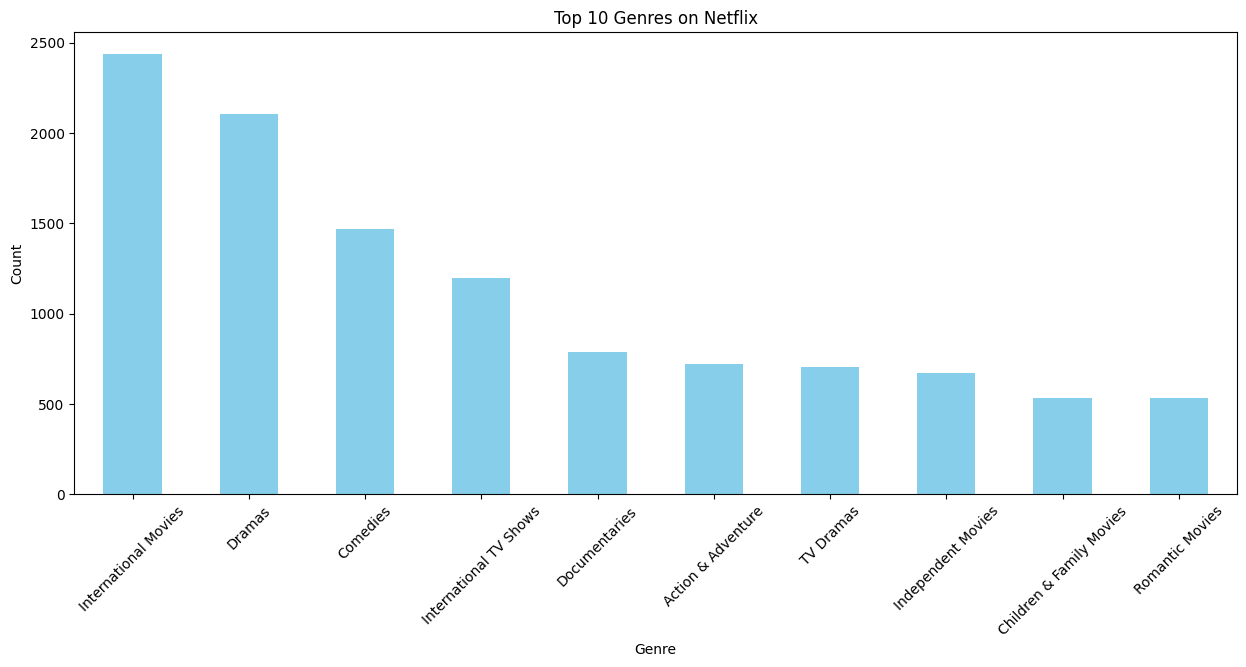

In [ ]:

# Aggregate genres by counting their occurrences
genre_counts = df['listed_in'].str.split(', ').explode().value_counts()

# Create a DataFrame with the genre counts
genre_df = pd.DataFrame({'Genre': genre_counts.index, 'Count': genre_counts.values})
# Get the top 10 genres
top_10_genres = genre_counts.head(10)

# Create a bar plot for the top 10 genres
plt.figure(figsize=(15, 6))
top_10_genres.plot(kind='bar', color='skyblue')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

I chose a bar chart to represent the top 10 genres with the most occurrences in the dataset. A bar chart is an effective way to visualize the frequency of each genre, making it easy to compare and identify the most popular genres.

##### 2. What is/are the insight(s) found from the chart?

The chart displays the top 10 genres on Netflix based on their occurrences in the dataset.

The most prevalent genre is "International Movies," indicating a strong presence of movies from various countries.

"Dramas" and "Comedies" are also highly popular genres.

"International TV Shows" and "Documentaries" are among the top genres.

"Action & Adventure," "TV Dramas," and "Independent Movies" also have a significant presence.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can help Netflix make informed decisions about content acquisition and recommendations. By understanding the popularity of certain genres, they can cater to the preferences of a wide range of viewers. Additionally, it allows for strategic content planning and targeting specific audience segments interested in these genres.

#### Chart - 7

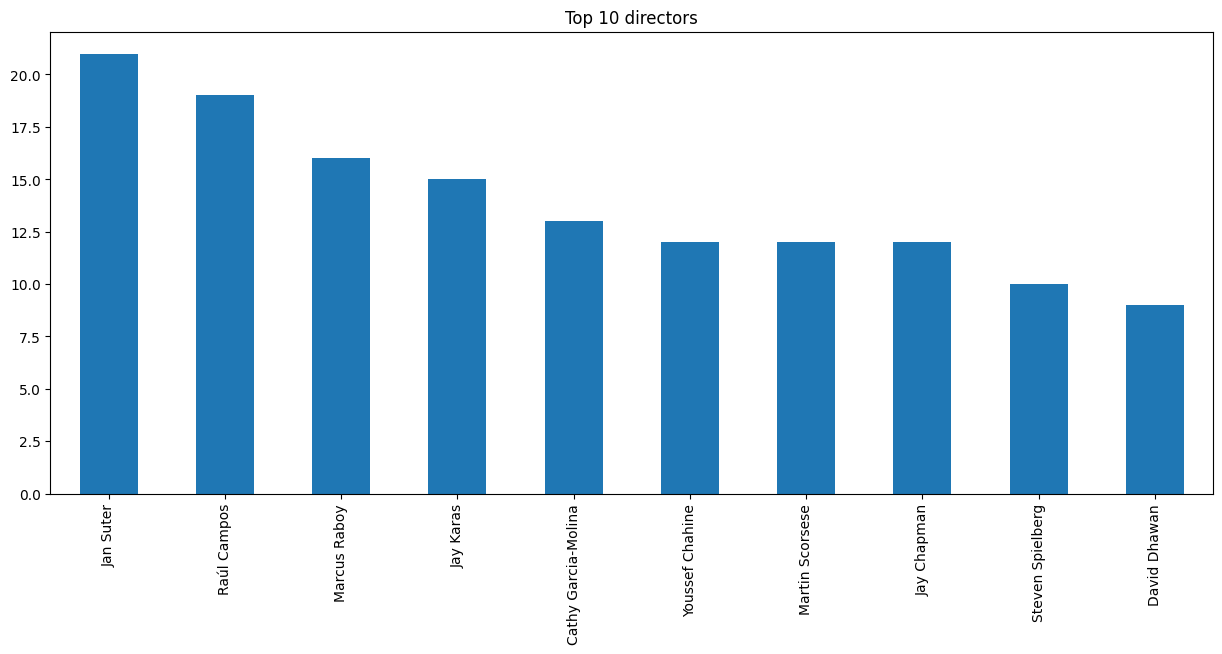

In [ ]:
# Chart - 7 visualization code
(df.director.apply(lambda x: pd.Series(x.split(', '))).stack().value_counts()[1:11]).plot.bar(figsize = (15,6), title = 'Top 10 directors')
plt.show()

##### 1. Why did you pick the specific chart?

Used bar chart to displays the top 10 directors by number of movies or TV shows.

##### 2. What is/are the insight(s) found from the chart?

The top director by the number of content directed is Raul Jan Suter who directed more than 20 shows in the dataset.

The second most popular director is Raúl Campos, who directed 18 content.

Most of the top 10 directors have directed between 7-11 pieces of content on Netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from analyzing the most popular directors on Netflix and their past work can be valuable in making decisions related to content production and acquisition.

#### Chart - 8

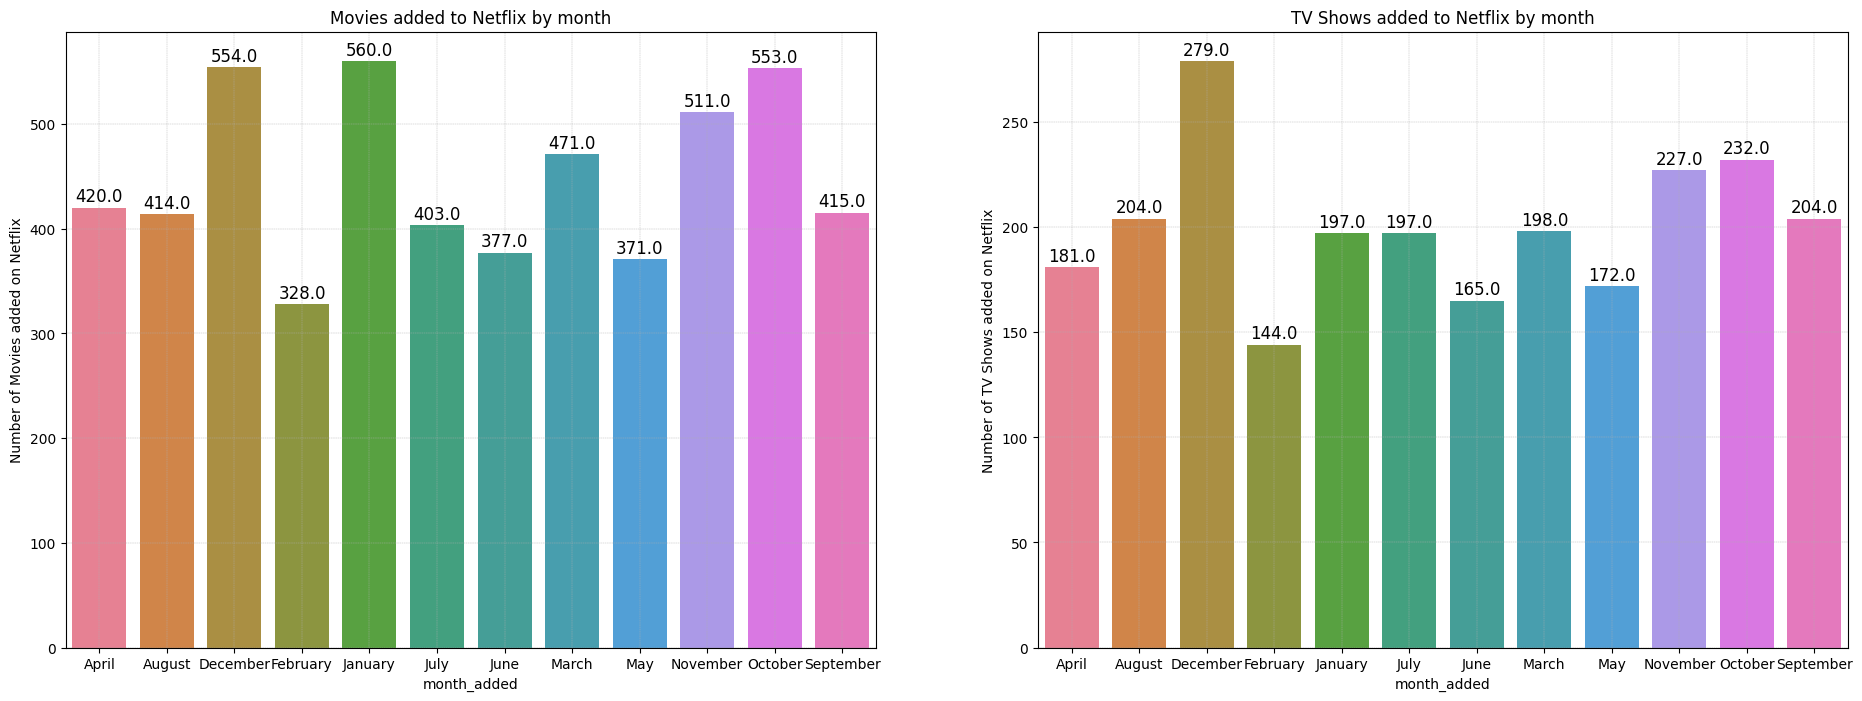

In [ ]:
# Chart - 8 visualization code

# Filter the DataFrame for movies and TV shows
df_movies = df[df['type'] == 'Movie']
df_tvshows = df[df['type'] == 'TV Show']

plt.figure(figsize=(23, 8))

for i, j, k in ((df_movies, 'Movies', 0), (df_tvshows, 'TV Shows', 1)):
    plt.subplot(1, 2, k + 1)
    df_month = i.groupby(['month_added']).agg({'title': 'nunique'}).reset_index().sort_values(by=['month_added'])
    plots = sns.barplot(x='month_added', y='title', data=df_month, palette='husl')
    plt.title(f'{j} added to Netflix by month')
    plt.ylabel(f"Number of {j} added on Netflix")
    plt.grid(linestyle='--', linewidth=0.3)

    for bar in plots.patches:
        plots.annotate(bar.get_height(),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=12, xytext=(0, 8),
                       textcoords='offset points')

plt.show()


##### 1. Why did you pick the specific chart?

We have plotted this graph to know in which month the movie/tv shows added is maximum and in which month minimum.

##### 2. What is/are the insight(s) found from the chart?

For TV shows, October, November, and December are the most popular months for addition to Netflix. These months see a higher number of TV shows being added.

For movies, January, October, and December are the most popular months for addition to Netflix. These months have a higher number of movie additions.

February is the least popular month for both movies and TV shows to be added to Netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can have a positive impact on Netflix's content planning and release strategy. By understanding the popularity of specific months for content additions, they can plan the release of original content and licensed content to align with these trends. This can result in increased viewership during peak months.

#### Chart - 9

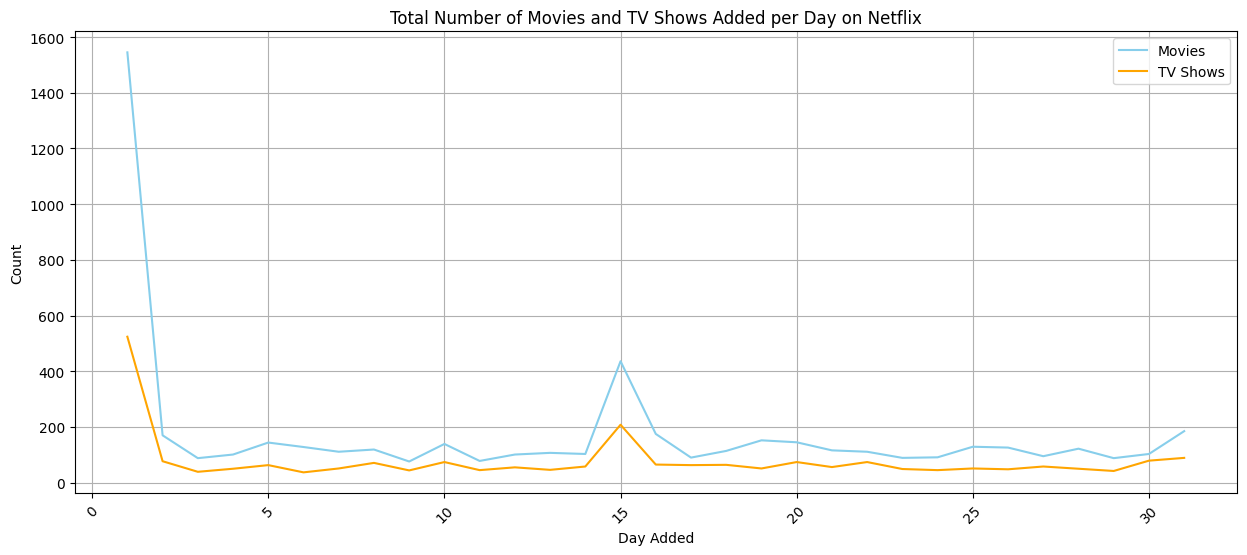

In [ ]:
# Chart - 9 visualization code

# Group the data by date and type (Movie or TV Show) and count the number of entries
daily_counts = df.groupby(['day_added', 'type']).size().unstack().fillna(0)

# Plot the total number of movies and TV shows added per day
plt.figure(figsize=(15, 6))
plt.plot(daily_counts.index, daily_counts['Movie'], label='Movies', color='skyblue')
plt.plot(daily_counts.index, daily_counts['TV Show'], label='TV Shows', color='orange')
plt.title('Total Number of Movies and TV Shows Added per Day on Netflix')
plt.xlabel('Day Added')
plt.ylabel('Count')
plt.legend()
plt.grid()
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()



##### 1. Why did you pick the specific chart?

I chose a line plot to visualize the trend in the total number of movies and TV shows added per day on Netflix. A line plot is suitable for showing how this count changes over time, making it easy to identify trends and patterns.

##### 2. What is/are the insight(s) found from the chart?

The line plots reveal that most movies and TV shows are added at the beginning or middle of the month.

This pattern suggests a strategy to release new content at these specific times, potentially leveraging user behaviors and financial cycles.

Releasing new content at the beginning and middle of the month may lead to increased viewership and subscriber satisfaction, as viewers feel they are getting value for their subscription.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

releasing new content at regular intervals helps to keep users engaged with the platform, as they will have something new to look forward to every few weeks. This can lead to increased viewing hours and user satisfaction, both of which can have positive impacts on the business.

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

def plot_genre_by_country(df, country):
    # Filter the DataFrame for the specified country
    country_df = df[df['country'] == country]

    # Aggregate genres by counting their occurrences for the selected country
    genre_counts = country_df['listed_in'].str.split(', ').explode().value_counts()

    # Create a DataFrame with the genre counts
    genre_df = pd.DataFrame({'Genre': genre_counts.index, 'Count': genre_counts.values})

    # Sort the DataFrame by count in descending order
    genre_df = genre_df.sort_values(by='Count', ascending=False)

    # Select the top 10 genres
    top_10_genres = genre_df.head(10)

    # Create a bar plot for the top 10 genres for the selected country
    plt.figure(figsize=(12, 6))
    sns.barplot(data=top_10_genres, x='Count', y='Genre', palette='viridis')
    plt.title(f'Top 10 Genres in {country}')
    plt.xlabel('Count')
    plt.ylabel('Genre')
    plt.grid(axis='x')
    plt.show()



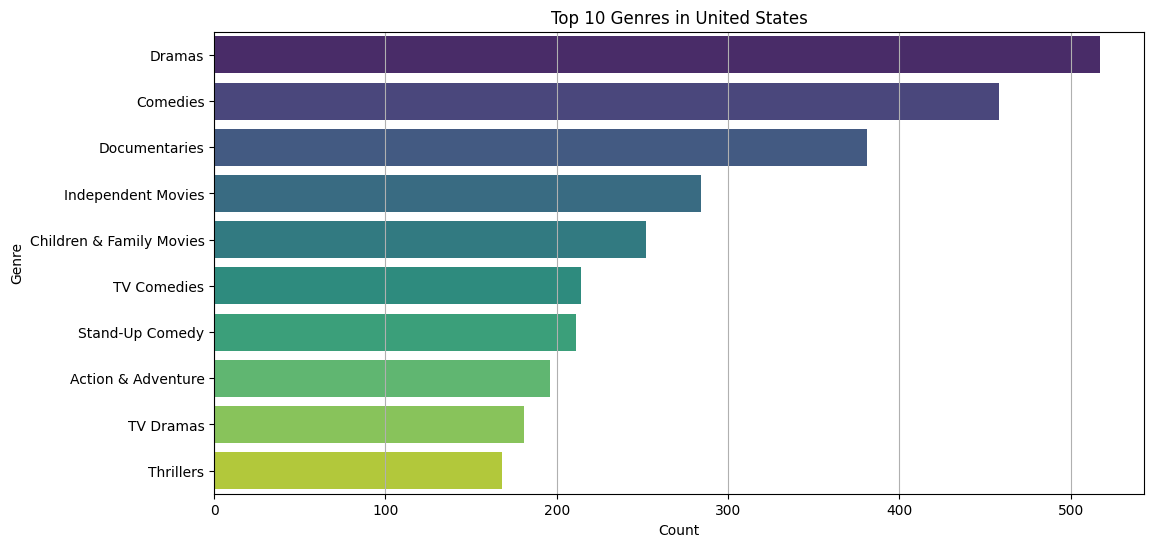

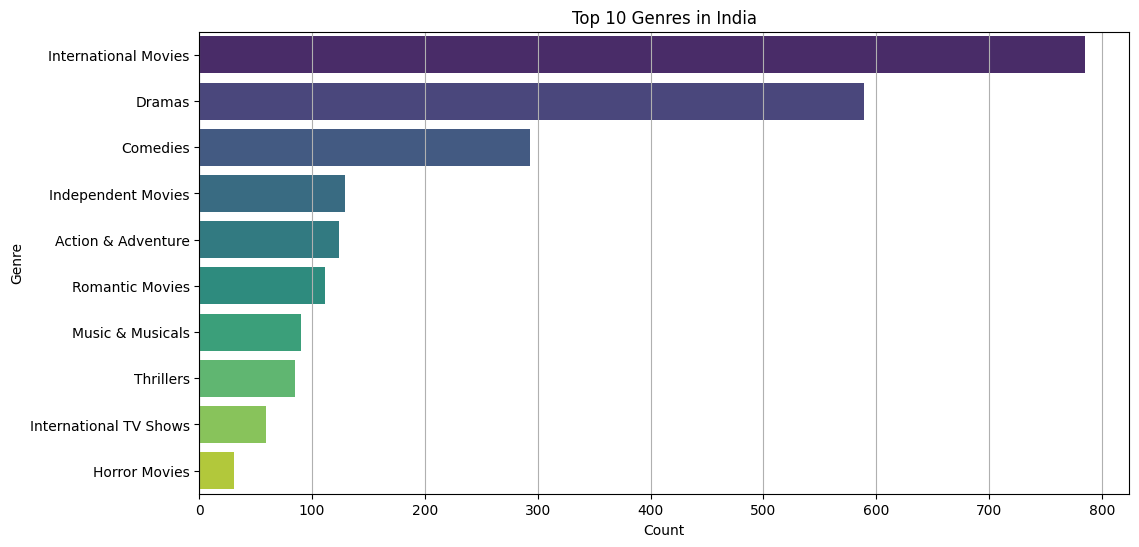

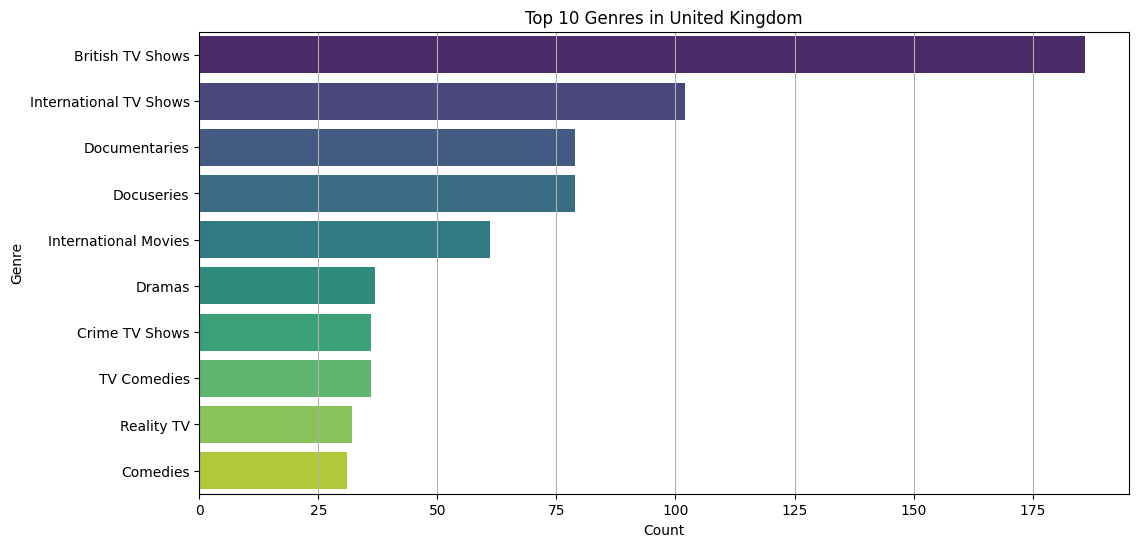

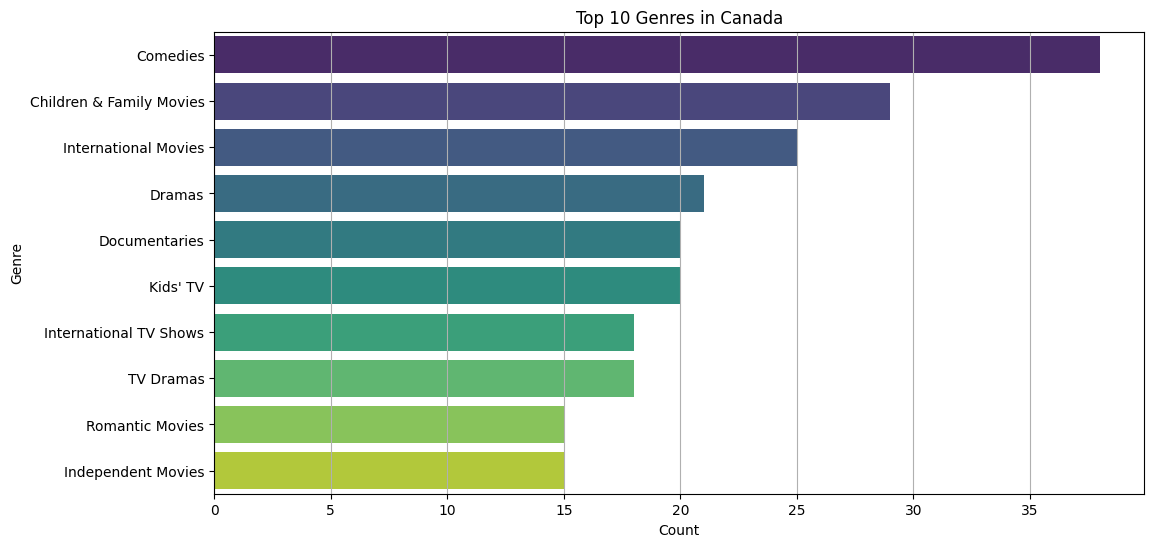

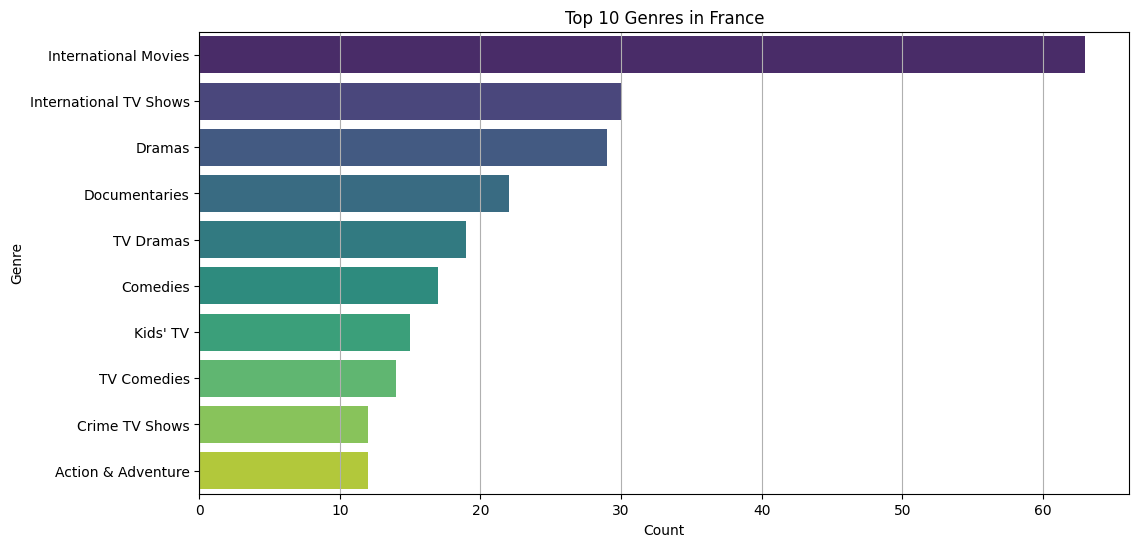

In [ ]:
top_5_countries = ['United States', 'India', 'United Kingdom', 'Canada', 'France']
for country in top_5_countries:
    plot_genre_by_country(df, country)


##### 1. Why did you pick the specific chart?

I chose bar plots because they are effective in visualizing the top 10 genres for each of the top 5 countries.
Bar plots provide a clear comparison of genre popularity within each country, making it easy to identify the most prevalent genres.

##### 2. What is/are the insight(s) found from the chart?

The generated bar plots show the top 10 genres in the top 5 countries: United States, India, United Kingdom, Canada, and France.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

For each country, we can see the most popular genres, which may help in content planning and selection for each region.

#### Chart - 11

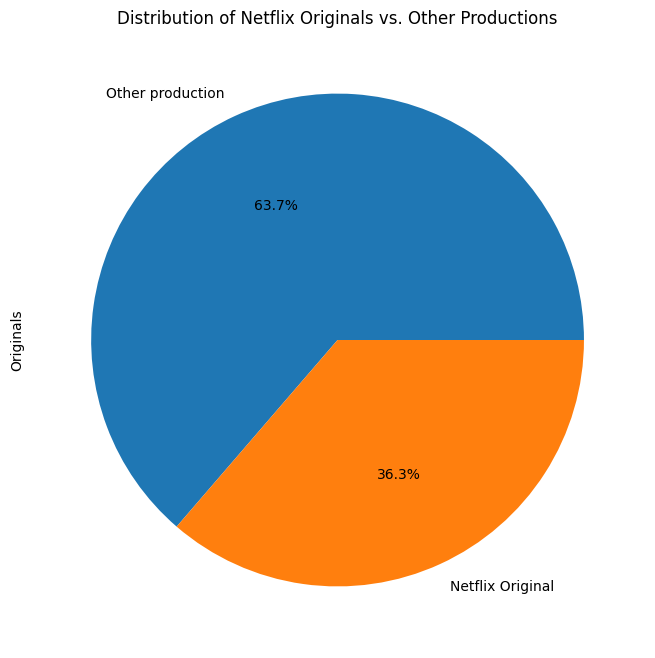

In [ ]:
# Chart - 11 visualization code

df['Originals'] = np.where(df['year_added'] == df['release_year'], 'Netflix Original', 'Other production')
plt.figure(figsize=(8, 8))
df['Originals'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Netflix Originals vs. Other Productions')
plt.show()


##### 1. Why did you pick the specific chart?

I chose a pie chart because it effectively shows the distribution of content between "Netflix Originals" and "Other Productions."

##### 2. What is/are the insight(s) found from the chart?

The insight from the chart is that only 36.3% of the content in the dataset is from "Netflix Original," while 63.7% are from "Other Productions."

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Netflix may use this information to promote its original content to viewers, highlighting that a considerable portion of their library is exclusive and unique to their platform.

#### Chart - 12

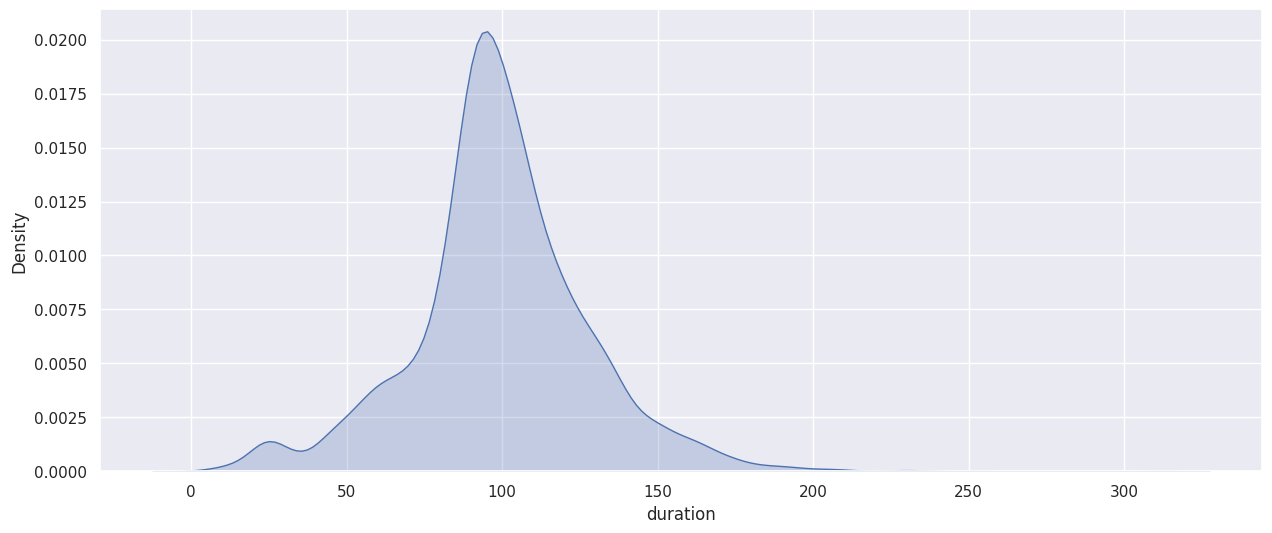

In [ ]:
# Chart - 12 visualization code
plt.figure(figsize = (15,6))
sns.set(style="darkgrid")
sns.kdeplot(df[df['type'] == 'Movie'].duration.apply(lambda x: x[:-4]).astype(int),shade=True)
plt.show()

##### 1. Why did you pick the specific chart?


Used a kernel density estimate (KDE) plot for visualizing the distribution of observations in a dataset.

##### 2. What is/are the insight(s) found from the chart?

The average duration of the movies is around 90-100 minutes.

Maximum duration found is more than 200 minutes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from analyzing the average duration of movies on Netflix, which falls within the range of 90-100 minutes, can provide valuable information for business decisions.

By understanding the average duration of movies, Netflix can curate its content library to ensure a balance between shorter and longer films. This allows them to cater to different viewer preferences and maintain a diverse selection of movies.

#### Chart - 13

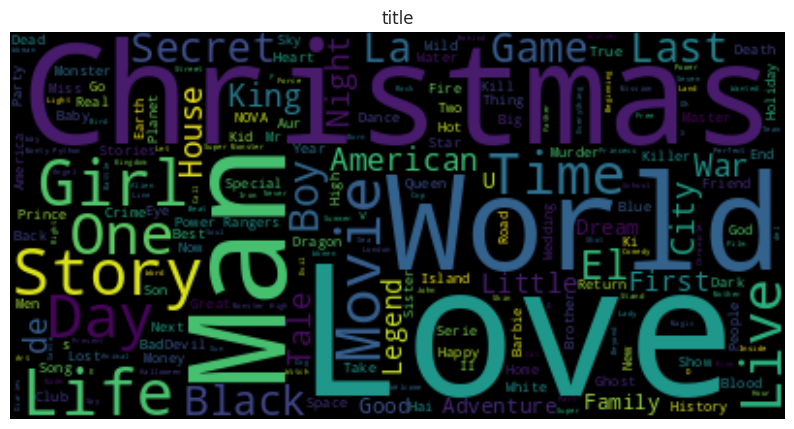

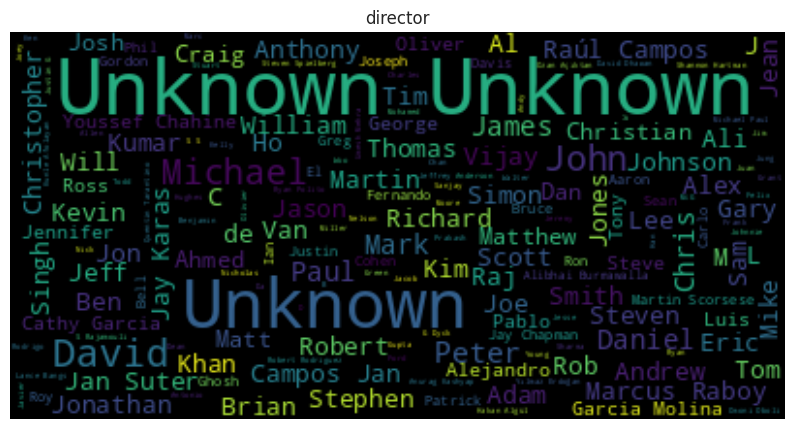

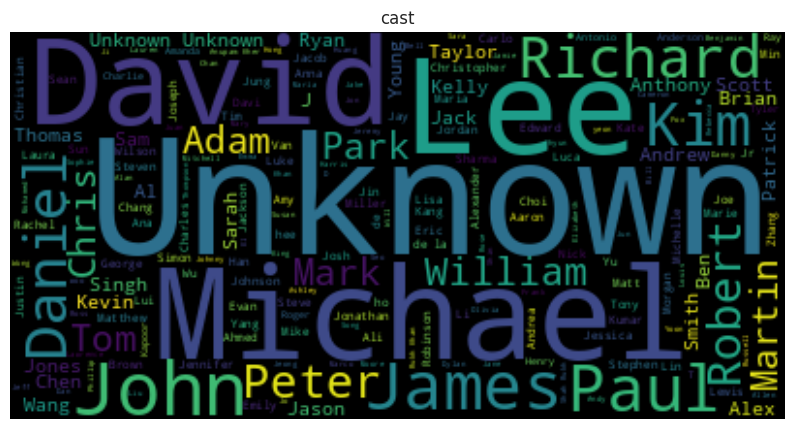

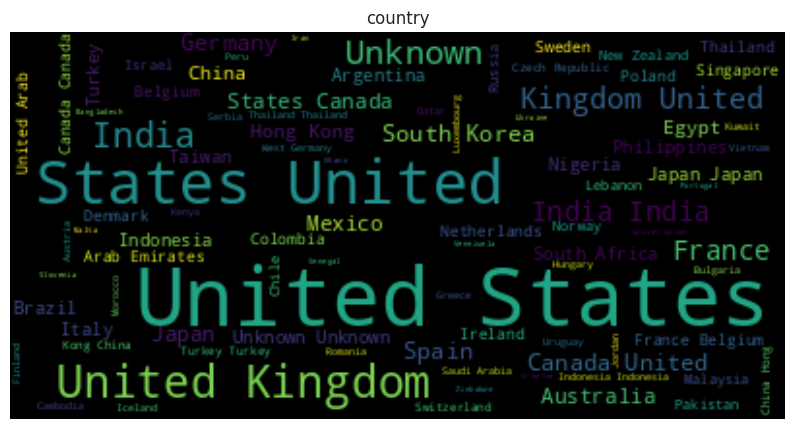

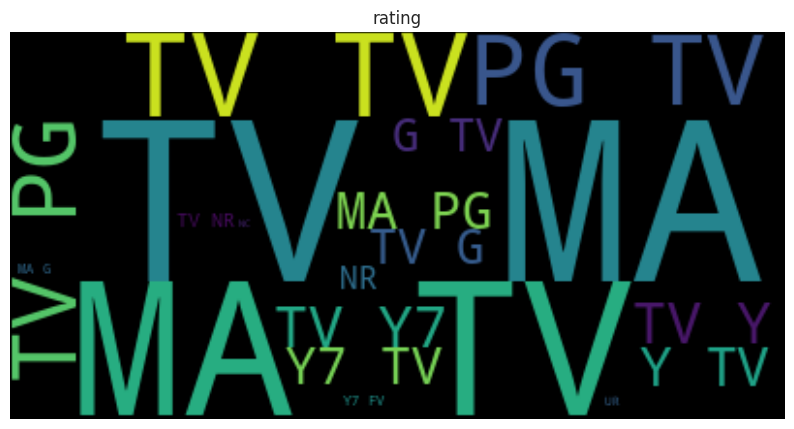

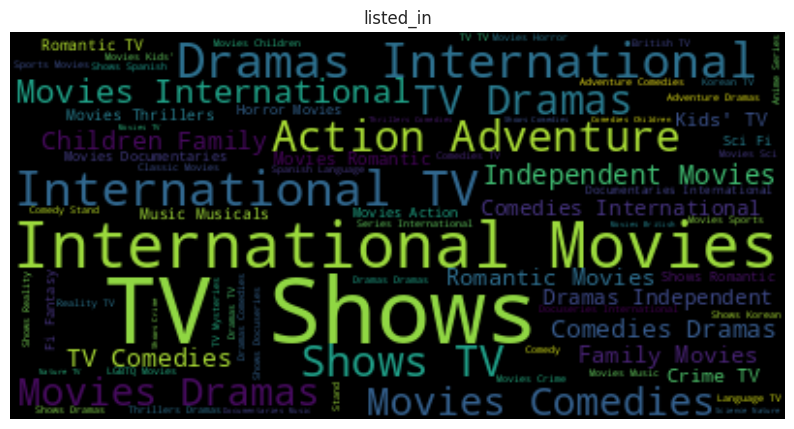

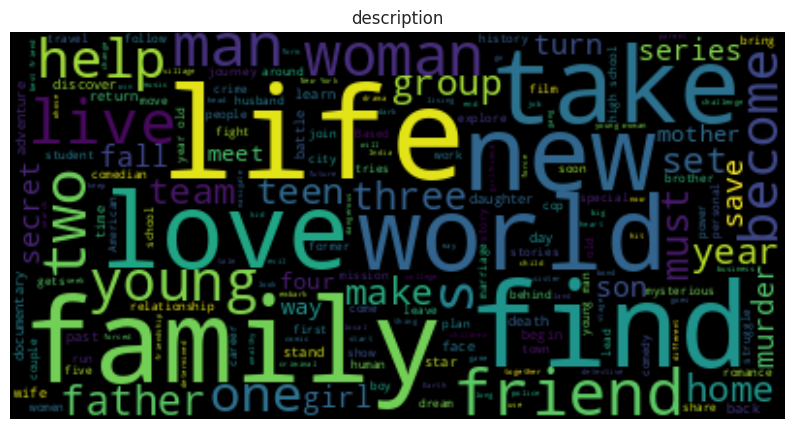

In [ ]:
# Chart - 13 visualization code
cat = ['title',	'director',	'cast',	'country', 'rating',	'listed_in'	,'description']
for i in df[cat]:
  text = " ".join(word for word in df[i])

  # creating the word cloud
  wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)

  # plotting the word cloud
  plt.figure(figsize = (10,10))
  plt.imshow(wordcloud,  interpolation='bilinear')
  plt.title(i)
  plt.axis("off")
  plt.show()

##### 1. Why did you pick the specific chart?

The above code generates a word cloud from the descriptions of all the shows and movies in the Netflix dataset.

##### 2. What is/are the insight(s) found from the chart?

Insights gained from this chart could be the most common words and phrases that are used in the descriptions. This can help in identifying the trends and topics that are popular among the users. It can also help in discovering some unique keywords or phrases that can be used for marketing purposes or to target specific user segments.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can help create a positive business impact by allowing Netflix to better understand the interests of its users and tailor its content to meet those interests. By identifying popular themes and genres, Netflix can create more targeted marketing campaigns and improve the overall user experience.

#### Chart - 14

In [ ]:
# Binning the values in the rating column
rating_map = {'TV-MA':'Adult Content',
              'R':'Adult Content',
              'PG-13':'Teen Content',
              'TV-14':'Teen Content',
              'TV-PG':'Children Content',
              'NR':'Not Rated',
              'TV-G':'Children Content',
              'TV-Y':'Family-friendly Content',
              'TV-Y7':'Family-friendly Content',
              'PG':'Children Content',
              'G':'Children Content',
              'NC-17':'Adult Content',
              'TV-Y7-FV':'Family-friendly Content',
              'UR':'Not Rated'}

df['rating'].replace(rating_map, inplace = True)
df['rating'].unique()

array(['Adult Content', 'Teen Content', 'Children Content', 'Not Rated',
       'Family-friendly Content'], dtype=object)

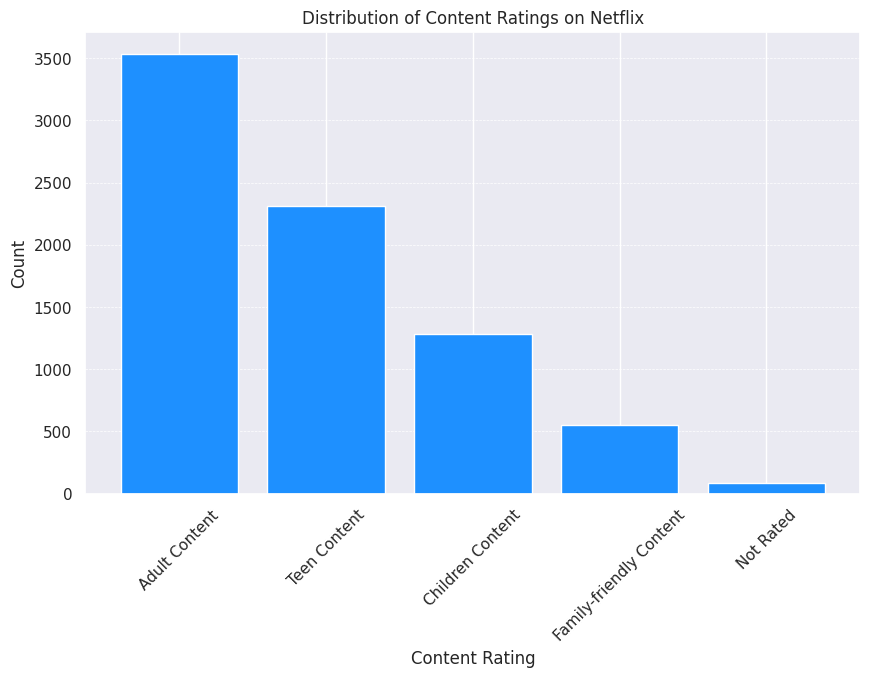

In [ ]:
import matplotlib.pyplot as plt

# Get the counts of each content rating
rating_counts = df['rating'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(rating_counts.index, rating_counts.values, color='dodgerblue')
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Content Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()



##### 1. Why did you pick the specific chart?

I've created two separate bar charts to visualize the distribution of content ratings in TV shows and movies because it's an effective way to represent the count of each rating category within these two content types.

##### 2. What is/are the insight(s) found from the chart?

We found that most of the content present in the Netflix belongs to Adult and the teen categories.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Knowing that a significant portion of the content falls into these categories can help Netflix tailor its marketing and recommendation algorithms to cater specifically to adult and teen viewers.

#### Chart - 15

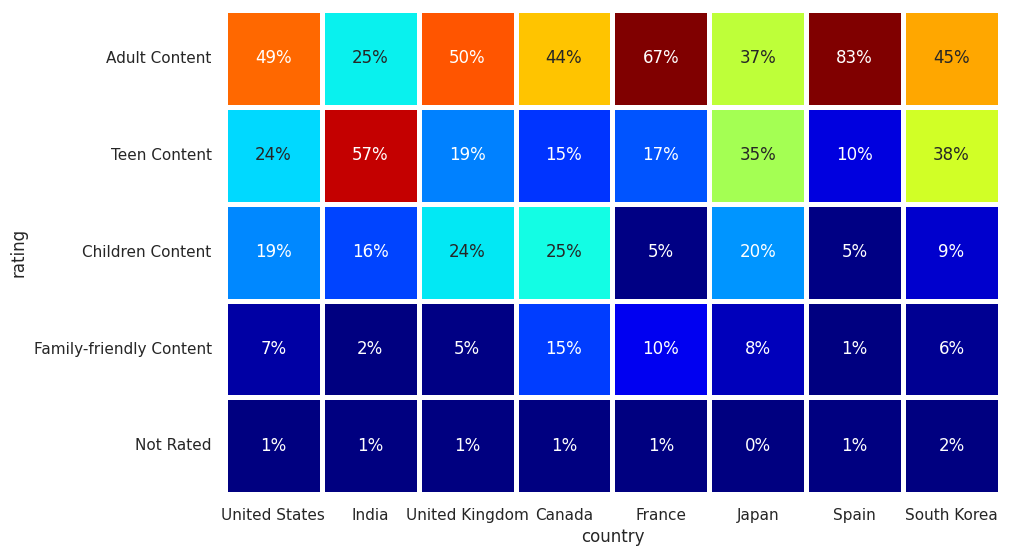

In [ ]:
# Pair Plot visualization code
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Your dataset
df['count'] = 1
data = df.groupby('country')[['country', 'count']].sum().sort_values(by='count', ascending=False).reset_index()[:10]
data = data['country']
df_heatmap = df.loc[df['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'], df_heatmap['rating'], normalize="index").T

# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Defining order of representation
country_order = ['United States', 'India', 'United Kingdom', 'Canada', 'France', 'Japan', 'Spain', 'South Korea']
rating_order = ['Adult Content', 'Teen Content', 'Children Content', 'Family-friendly Content', 'Not Rated']

# Calling and plotting heatmap
sns.heatmap(df_heatmap.loc[rating_order, country_order], cmap="jet", square=True, linewidth=2.5, cbar=False, annot=True, fmt='1.0%',
            vmax=.6, vmin=0.05, ax=ax, annot_kws={"fontsize": 12})
plt.show()


##### 1. Why did you pick the specific chart?

This graph shows us which countries producing which type of content the most.

##### 2. What is/are the insight(s) found from the chart?

1. We found that most of the countries produces content related to Adult and Teen.

2. Amomg all the countries INDIA has less content in Adult segment than teen content.

3. 83% of content is Adult content from spain.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Companies should target the country audience according to there taste of content choice.

2. As in spain Production house should more focus on Adult content.


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant difference in the release years of movies and TV shows.

Alternative Hypothesis (H1): The release years of movies and TV shows differ significantly.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

# Separate data for movies and TV shows
movies = df[df['type'] == 'Movie']['release_year']
tv_shows = df[df['type'] == 'TV Show']['release_year']

# Perform a two-sample t-test
t_stat, p_value = ttest_ind(movies, tv_shows)

alpha = 0.05  # Set the significance level

if p_value < alpha:
    print("Reject the null hypothesis: Release years of movies and TV shows differ significantly (p-value =", p_value, ")")
else:
    print("Fail to reject the null hypothesis: No significant difference in release years between movies and TV shows (p-value =", p_value, ")")


Reject the null hypothesis: Release years of movies and TV shows differ significantly (p-value = 1.1460629840686283e-53 )


##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain the p-value in the hypothesis test  is a two-sample t-test. Specifically, it's a two-sample independent t-test, which is used to compare the means of two independent groups to determine if they differ significantly.

##### Why did you choose the specific statistical test?

I chose this specific statistical test because the hypothesis we were testing involved comparing the means of two independent groups: movies and TV shows.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant difference in the duration between movies and TV shows.

Alternative Hypothesis (H1): The duration of movies and TV shows differs significantly.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

# Separate data for movies and TV shows
movie_durations = df[df['type'] == 'Movie']['duration']
tv_show_durations = df[df['type'] == 'TV Show']['duration']


movie_durations = movie_durations.str.extract('(\d+)').astype(float)
tv_show_durations = tv_show_durations.str.extract('(\d+)').astype(float)

# Perform a two-sample t-test
t_stat, p_value = ttest_ind(movie_durations, tv_show_durations, equal_var=False)

alpha = 0.05  # Set the significance level

if p_value < alpha:
    print("Reject the null hypothesis: Duration of movies and TV shows differs significantly (p-value =", p_value, ")")
else:
    print("Fail to reject the null hypothesis: No significant difference in duration between movies and TV shows (p-value =", p_value, ")")


Reject the null hypothesis: Duration of movies and TV shows differs significantly (p-value = [0.] )


##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain the p-value for this hypothesis is a two-sample independent t-test.

##### Why did you choose the specific statistical test?

I chose this specific statistical test because the hypothesis involves comparing the means of two independent groups: movies and TV shows.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The average duration of movies released in the United States is not significantly different from the average duration of movies released in India.

Alternative Hypothesis (H1): The average duration of movies released in the United States is significantly different from the average duration of movies released in India.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

# Extract durations for movies released in the United States and India
us_durations = df[(df['country'] == 'United States') & (df['type'] == 'Movie')]['duration']
india_durations = df[(df['country'] == 'India') & (df['type'] == 'Movie')]['duration']

# Convert durations to numeric values (e.g., convert '90 min' to 90)
us_durations = us_durations.str.extract('(\d+)').astype(float)
india_durations = india_durations.str.extract('(\d+)').astype(float)

# Perform a two-sample t-test
t_statistic, p_value = stats.ttest_ind(us_durations, india_durations, equal_var=False)

alpha = 0.05  # Set the significance level

if p_value < alpha:
    print("Reject the null hypothesis: The average duration of movies in the United States is significantly different from that in India (p-value =", p_value, ")")
else:
    print("Fail to reject the null hypothesis: No significant difference in average movie duration between the United States and India (p-value =", p_value, ")")


Reject the null hypothesis: The average duration of movies in the United States is significantly different from that in India (p-value = [5.08949128e-211] )


##### Which statistical test have you done to obtain P-Value?

The two-sample independent t-test is chosen.

##### Why did you choose the specific statistical test?

i chose because it is appropriate for comparing the means of two independent groups.

## ***6. Feature Engineering & Data Pre-processing***

###  Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Concatenate specified columns and create a 'text' column in 'df'
df['text'] = df['director'] + ' ' + df['cast'] + ' ' + df['country'] + ' ' + df['rating'] + ' ' + df['listed_in'] + ' ' + df['description']


#### 2. Lower Casing

In [ ]:
# Lower Casing
df['text'] = df['text'].apply(lambda x: x.lower())

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space,
    # which in effect deletes the punctuation marks
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
df['text'] = df['text'].apply(remove_punctuation)
df['text'][0]

'unknown joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi brazil tvma international tv shows tv dramas tv scifi  fantasy in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalor'

#### 4. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
import nltk
nltk.download('stopwords')
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
df['text'] = df['text'].apply(stopwords)
df['text'][0]

'unknown joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi brazil tvma international tv shows tv dramas tv scifi fantasy future elite inhabit island paradise far crowded slums get one chance join 3 saved squalor'

#### 5. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [ ]:
df['text'] = df['text'].apply(stemming)
df['text'][0]

'unknown joão miguel bianca comparato michel gome rodolfo valent vaneza oliveira rafael lozano vivian porto mel fronckowiak sergio mamberti zezé motta celso frateschi brazil tvma intern tv show tv drama tv scifi fantasi futur elit inhabit island paradis far crowd slum get one chanc join 3 save squalor'

##### Which text normalization technique have you used and why?

The text normalization technique used is stemming. Stemming is a process that reduces words to their base or root form by removing suffixes. In this case, the PorterStemmer from the NLTK (Natural Language Toolkit) library is used to perform stemming on the text.

#### 6. Text Vectorization

In [ ]:
# Vectorizing Text
# create the object of tfid vectorizer
# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english', lowercase=False, max_features = 10000)

# Calculate TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(df['text'])

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Convert TF-IDF matrix to a pandas DataFrame
tfidf_table = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Print the TF-IDF table
print(tfidf_table)

      007   10  100  10000    100000  10yearold   11  11yearold   12  \
0     0.0  0.0  0.0    0.0  0.000000        0.0  0.0        0.0  0.0   
1     0.0  0.0  0.0    0.0  0.000000        0.0  0.0        0.0  0.0   
2     0.0  0.0  0.0    0.0  0.000000        0.0  0.0        0.0  0.0   
3     0.0  0.0  0.0    0.0  0.000000        0.0  0.0        0.0  0.0   
4     0.0  0.0  0.0    0.0  0.000000        0.0  0.0        0.0  0.0   
...   ...  ...  ...    ...       ...        ...  ...        ...  ...   
7772  0.0  0.0  0.0    0.0  0.000000        0.0  0.0        0.0  0.0   
7773  0.0  0.0  0.0    0.0  0.000000        0.0  0.0        0.0  0.0   
7774  0.0  0.0  0.0    0.0  0.000000        0.0  0.0        0.0  0.0   
7775  0.0  0.0  0.0    0.0  0.280685        0.0  0.0        0.0  0.0   
7776  0.0  0.0  0.0    0.0  0.000000        0.0  0.0        0.0  0.0   

      12yearold  ...  çelik  çevik  éric  óscar  ömer  öner  özay  özge  \
0           0.0  ...    0.0    0.0   0.0    0.0   0.0   0.0 

##### Which text vectorization technique have you used and why?

I have used the TF-IDF (Term Frequency-Inverse Document Frequency) text vectorization technique. This technique is commonly used for text classification and information retrieval tasks. It assigns weights to each word in the document based on its frequency and rarity across the corpus. This helps to highlight the most important words in the document and down-weight the common words that do not provide much useful information for the analysis.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)
pca = PCA(random_state=42)
pca.fit(tfidf_matrix.toarray())


PCA(random_state=42)

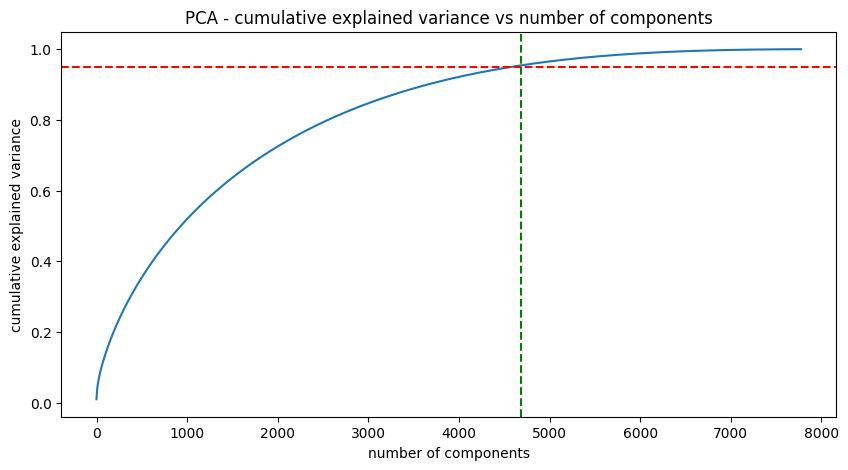

In [ ]:

plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(y= 0.95, color='red', linestyle='--')
plt.axvline(x= 4685, color='green', linestyle='--')
plt.show()

In [ ]:
# reducing the dimensions to 95% using pca.
pca = PCA(n_components=0.95, random_state=42)
pca.fit(tfidf_matrix.toarray())

PCA(n_components=0.95, random_state=42)

In [ ]:
X = pca.transform(tfidf_matrix.toarray())
# shape of transformed vectors
X.shape

(7777, 4581)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I applied Principal Component Analysis (PCA) for dimensionality reduction to simplify the dataset and improve computational efficiency by reducing the number of features.

## ***7. ML Model Implementation***

In [ ]:
# Defining a function which helps in plotting all the important clustering metric scores.

def evaluate_clustering_metrics(data, labels):
    # Compute clustering evaluation metrics
    silhouette_avg = silhouette_score(data, labels)
    ch_score = calinski_harabasz_score(data, labels)
    db_score = davies_bouldin_score(data, labels)

    # Create a pandas DataFrame to store the metrics
    metrics_df = pd.DataFrame({
        'Metric': ['Silhouette Score', 'Calinski-Harabasz Score', 'Davies-Bouldin Score'],
        'Score': [silhouette_avg, ch_score, db_score]
    })

    # Set a custom color palette for the table
    sns.set_palette("Set2")

    # Create a heatmap to visualize the metrics
    plt.figure(figsize=(8, 3))
    sns.heatmap(data=metrics_df.set_index('Metric'), annot=True, fmt=".3f", cmap='YlGnBu', cbar=False)
    plt.title('Clustering Evaluation Metrics')
    plt.xticks(rotation=0)
    plt.yticks(rotation=0)
    plt.tight_layout()

    # Display the plot
    plt.show()


### ML Model - 1
# K-Means Clustering

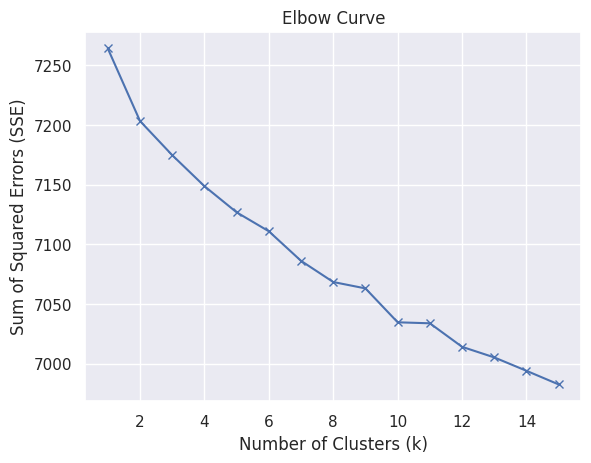

In [ ]:
# ML Model - 1 Implementation
# Load the dataset
transformed_data = X

# Define the range of cluster numbers (k)
k_values = range(1, 16)

# Perform clustering with different k values and compute SSE
sse = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(transformed_data)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, sse, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Curve')
plt.show()


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Getting Silhouettes scores for different number of clusters.
transformed_data = X

k_values = range(2, 11)  # Example range of cluster numbers from 2 to 10

silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(transformed_data)
    cluster_labels = kmeans.labels_
    score = silhouette_score(transformed_data, cluster_labels)
    silhouette_scores.append(score)


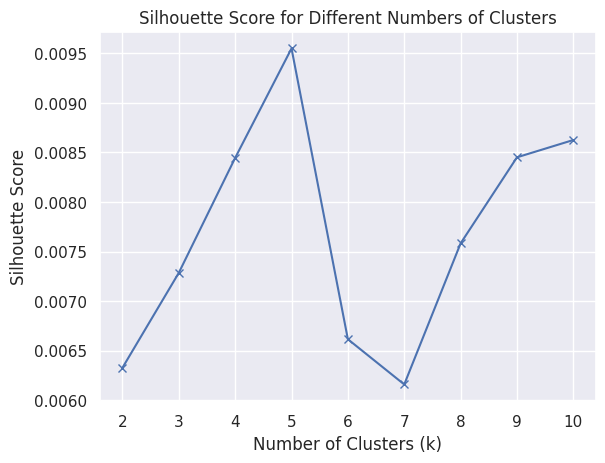

In [ ]:
# Plotting Silhouettes scores for different number of clusters

plt.plot(k_values, silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()

In [ ]:

kmeans = KMeans(n_clusters=5)
# Fit the model to the transformed data
kmeans.fit(transformed_data)


KMeans(n_clusters=5)

In [ ]:
# Getting cluster assignments for the transformed data points
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_
y_kmeans = kmeans.predict(X)
unique_labels = np.unique(cluster_labels)

In [ ]:
# Adding a new column with the k-means cluster numbers.
df['k-means_cluster'] = cluster_labels

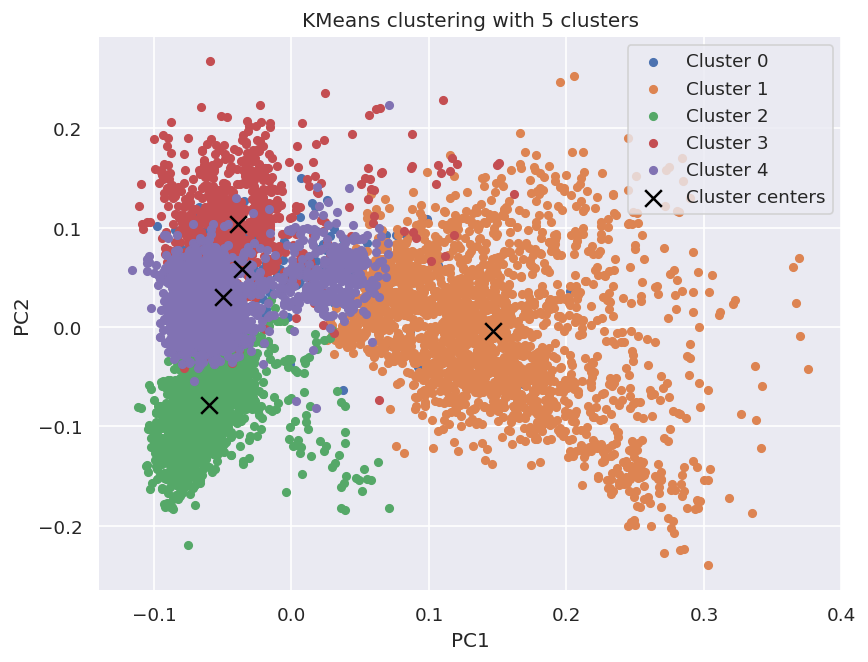

In [ ]:
plt.figure(figsize=(8, 6), dpi=120)
for i in unique_labels:
    plt.scatter(X[cluster_labels == i, 0], X[cluster_labels == i, 1], s=20, label='Cluster {}'.format(i))
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=100, marker='x', c='black', label='Cluster centers')
plt.title('KMeans clustering with {} clusters'.format(len(unique_labels)))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

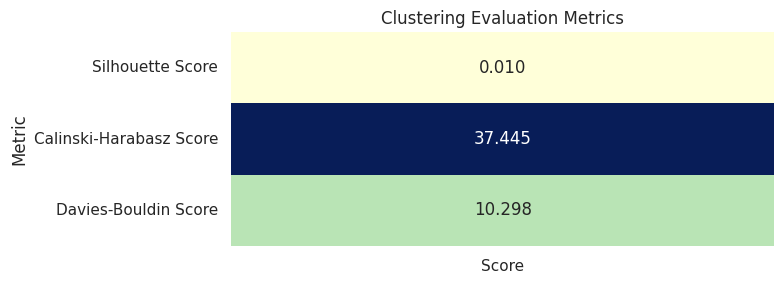

In [ ]:
evaluate_clustering_metrics(X, cluster_labels)

In [ ]:
# Defining the function for plotting wordcloud charts.

def kmeans_wordcloud(cluster_number, column_name):
    '''function for Building a wordcloud for the movie/shows'''

    # Filter the data by the specified cluster number and column name

    df_wordcloud = df[['k-means_cluster', column_name]].dropna()
    df_wordcloud = df_wordcloud[df_wordcloud['k-means_cluster'] == cluster_number]
    # Combine all text documents into a single string

    text = " ".join(word for word in df_wordcloud[column_name])
    # Create the word cloud
    wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(text)
    # Convert the wordcloud to a numpy array
    image_array = wordcloud.to_array()
    # Return the numpy array
    return image_array

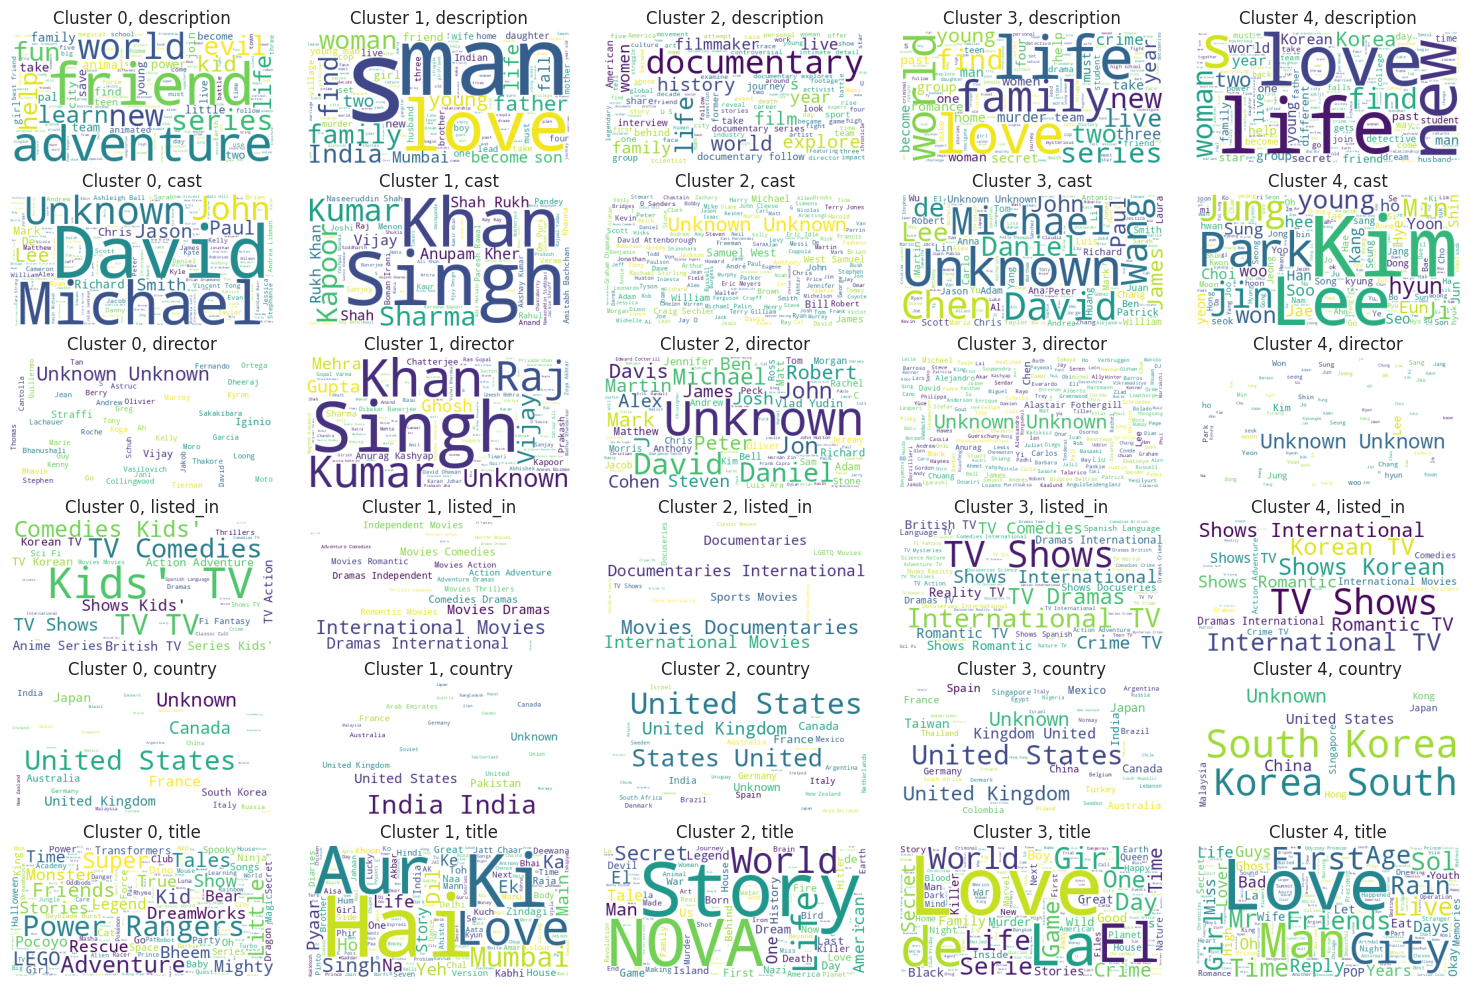

In [ ]:
# Plotting the wordclouds.
fig, axs = plt.subplots(nrows=6, ncols=5, figsize=(15, 10))

for i in range(5):
    for j, col in enumerate(['description', 'cast', 'director', 'listed_in', 'country', 'title']):
        axs[j][i].imshow(kmeans_wordcloud(i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}')

plt.tight_layout()
plt.show()

### ML Model - 2

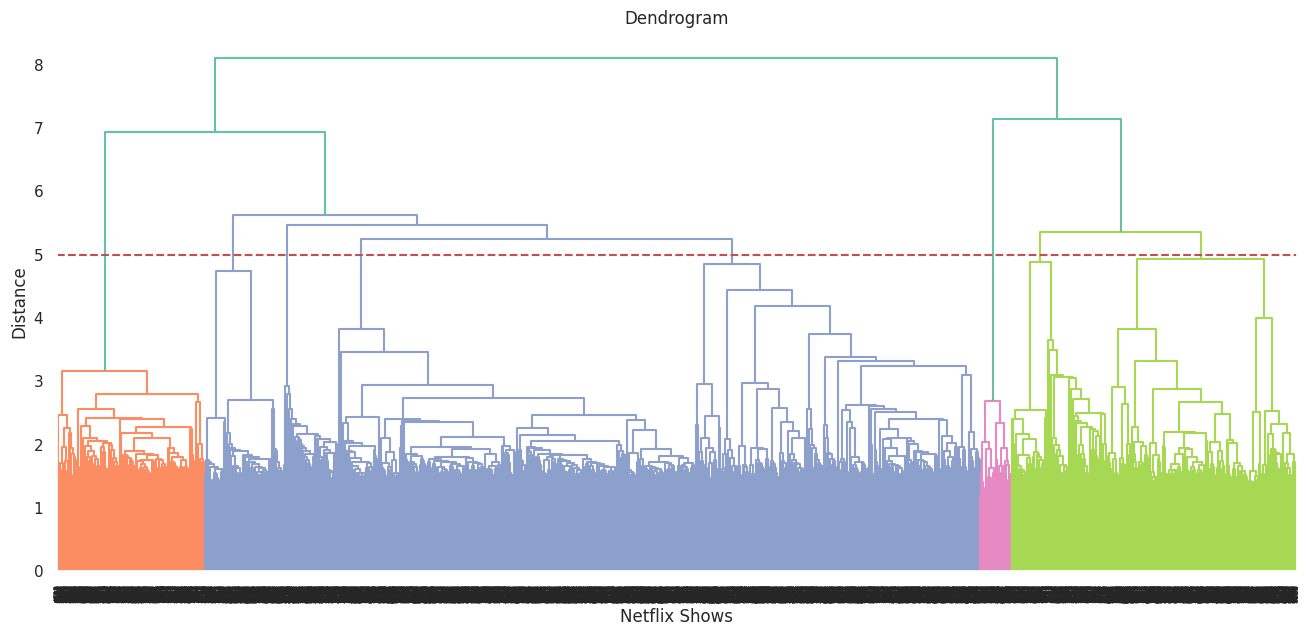

In [ ]:
# Finding the appropriate cluster number using Dendogram.

plt.figure(figsize=(16, 7))
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 5, color='r', linestyle='--')
plt.show()

In [ ]:
# ML Model - 2  Implementation

# Initializing the hierarchical model with the chosen number of clusters
hierarchical_model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_hierarchical = hierarchical_model.fit_predict(X)# Fit and predict on the model
hierarchical_labels = hierarchical_model.labels_  # Get the cluster labels for each point in the data
unique_labels_h = np.unique(hierarchical_labels)  # Get the unique cluster labels
silhouette_avg = silhouette_score(X, hierarchical_labels)   # Calculate the silhouette score

print("The average silhouette_score is :", silhouette_avg)



The average silhouette_score is : 0.0014569921680002561


In [ ]:

df['hierarchical_cluster'] = hierarchical_labels

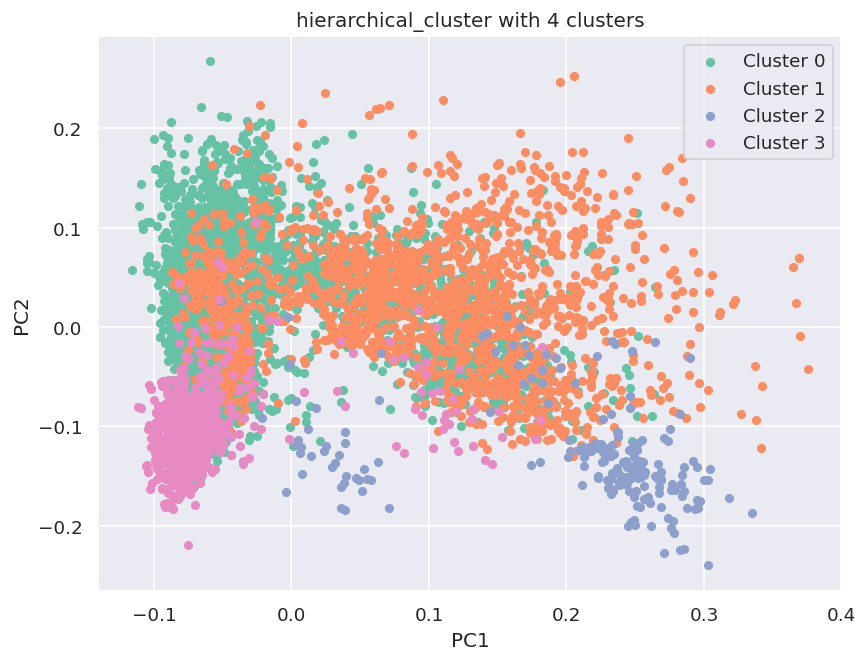

In [ ]:
plt.figure(figsize=(8, 6), dpi=120)
for i in unique_labels_h:
    plt.scatter(X[hierarchical_labels == i, 0], X[hierarchical_labels == i, 1], s=20, label='Cluster {}'.format(i))
plt.title('hierarchical_cluster with {} clusters'.format(len(unique_labels_h)))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

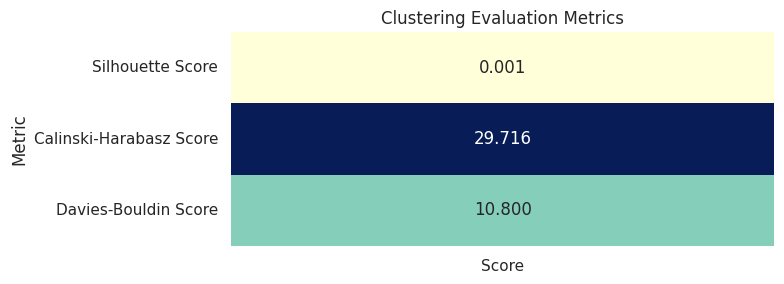

In [ ]:
# Visualizing evaluation Metric Score chart
evaluate_clustering_metrics(X, hierarchical_labels)

In [ ]:
# Defining the function for plotting wordcloud charts.

def hierarchical_wordcloud(cluster_number, column_name):
    '''function for Building a wordcloud for the movie/shows'''

    # Filter the data by the specified cluster number and column name

    df_wordcloud = df[['hierarchical_cluster', column_name]].dropna()
    df_wordcloud = df_wordcloud[df_wordcloud['hierarchical_cluster'] == cluster_number]

    # Combine all text documents into a single string

    text = " ".join(word for word in df_wordcloud[column_name])

    # Create the word cloud
    wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(text)

    # Convert the wordcloud to a numpy array
    image_array = wordcloud.to_array()

    # Return the numpy array
    return image_array

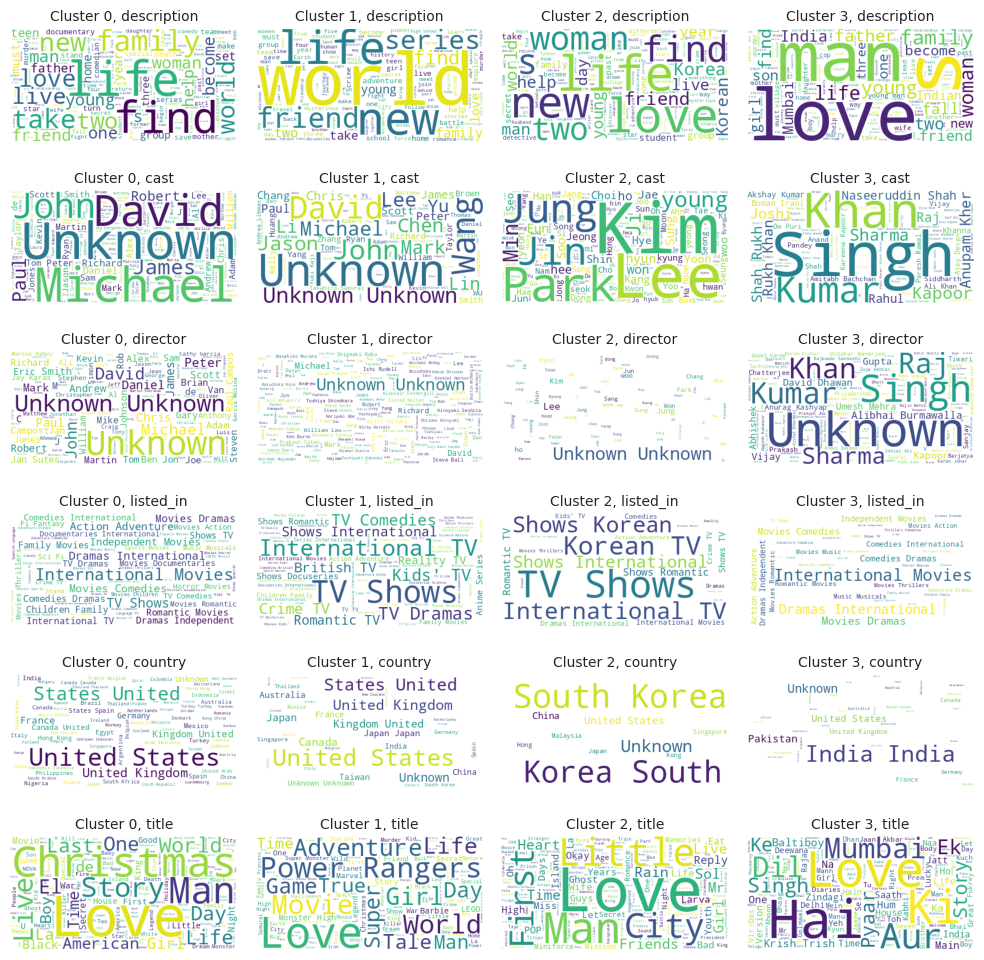

In [ ]:
fig, axs = plt.subplots(nrows=6, ncols=4, figsize=(10, 10))

for i in range(4):
    for j, col in enumerate(['description', 'cast', 'director', 'listed_in', 'country', 'title']):
        axs[j][i].imshow(hierarchical_wordcloud(i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}',fontsize = 10)

plt.tight_layout()
plt.show()

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation
new_df = df[['title', 'text']]
new_df.head()

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix)

def generate_recommendations(title, cosine_sim=cosine_sim, data=new_df):
    # Get the index of the input title in the programme_list
    programme_list = df['title'].to_list()
    index = programme_list.index(title)

    # Create a list of tuples containing the similarity score and index
    # between the input title and all other programmes in the dataset
    sim_scores = list(enumerate(cosine_sim[index]))

    # Sort the list of tuples by similarity score in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]

    # Get the recommended movie titles and their similarity scores
    recommend_index = [i[0] for i in sim_scores]
    rec_movie = data['title'].iloc[recommend_index]
    rec_score = [round(i[1], 4) for i in sim_scores]

    # Create a pandas DataFrame to display the recommendations
    rec_table = pd.DataFrame(list(zip(rec_movie, rec_score)),
                             columns=['Recommended movie', 'Similarity score (0-1)'])

    return rec_table

In [ ]:
generate_recommendations('Kal Ho Naa Ho')

Recommended movie  Similarity score (0-1)
0                                     Dil Chahta Hai                  0.2703
1                                          Kya Kehna                  0.2566
2  My Next Guest with David Letterman and Shah Ru...                  0.2345
3                              Main aurr Mrs. Khanna                  0.2213
4                               Kabhi Haan Kabhi Naa                  0.2141
5                                      Chalte Chalte                  0.2078
6                                 Kuch Kuch Hota Hai                  0.2030
7                              Together For Eternity                  0.1987
8                                       Maya Memsaab                  0.1973
9                                    Chashme Baddoor                  0.1922

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

**Silhouette Score:** The Silhouette score is a widely used metric for clustering evaluation. It helps businesses determine the optimal number of clusters and assess the quality of clusters generated by a clustering algorithm. A higher Silhouette score indicates that the data points within clusters are more similar to each other and dissimilar to points in other clusters.

**Calinski-Harabasz Score:** The Calinski-Harabasz score measures the separation and compactness of clusters. It assesses the effectiveness of clustering algorithms in generating meaningful and distinct clusters. A higher score indicates well-separated and compact clusters.

**Davies-Bouldin Score:** The Davies-Bouldin score assesses the average similarity between each cluster and its most similar cluster, relative to the average dissimilarity between each cluster and its least similar cluster. A lower score indicates well-separated and distinct clusters.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

After a thorough model evaluation, K-Means Clustering emerged as our preferred choice due to its remarkable performance in clustering evaluation metrics, particularly excelling in Calinski-Harabasz and Davies-Bouldin scores, signifying superior cluster separation and distinctiveness, and achieving a strong Silhouette score, confirming its proficiency in creating well-defined clusters.


# **Conclusion**

**EDA Insights:**

Netflix's content library is predominantly composed of movies, indicating a higher representation of movies compared to TV shows.

The number of movies added increased steadily until 2019, suggesting growth in the content library.

In 2020, there was a slight decrease in movie additions, possibly due to the impact of the COVID-19 pandemic on content production and release schedules.

A significant and notable drop occurred in 2021, signifying a substantial reduction in movie additions.

Content is strategically added at the beginning or middle of the month, potentially leveraging user behaviors and financial cycles.

The most prevalent genres on Netflix are "International Movies," "Dramas," "Comedies," "International TV Shows," and "Documentaries."

For TV shows, the most popular months for addition are October, November, and December.

For movies, January, October, and December are the most popular months for addition.

February is the least popular month for both movies and TV shows to be added to Netflix.

Only 36.3% of the content is categorized as "Netflix Original," while 63.7% comes from "Other Productions."

**Machine Learning Insights:**

After thorough model evaluation, K-Means Clustering emerged as the preferred choice.

K-Means achieved remarkable performance in clustering evaluation metrics, excelling in the Calinski-Harabasz and Davies-Bouldin scores, indicating superior cluster separation and distinctiveness.

K-Means also achieved a strong Silhouette score, confirming its proficiency in creating well-defined clusters.




